#### Importing Libraries

In [1]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

#### Getting keywords from text using keyBert architecture

In [2]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

def get_keyword(docs):
    final_keywords = []
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=3,stop_words='english')
    return onewords

#### Here we get each chapterwise keywords

In [3]:
book ="SOMEWT"
dir_path = './%s/part'% book
rootdir = r"C:\Users\hp\OneDrive\Documents\topic_coherence\%s"% book
part = 1
mp = {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp[key] = get_keyword(content)
        x = target_x
        part += 1

1/chapter1
1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
2/chapter1
2/chapter2
2/chapter3
2/chapter4
2/chapter5
2/chapter6
2/chapter7
2/chapter8
2/chapter9
2/chapter10
2/chapter11
2/chapter12
2/chapter13
2/chapter14
2/chapter15
2/chapter16
2/chapter17
2/chapter18
2/chapter19
2/chapter20
2/chapter21
2/chapter22
2/chapter23
2/chapter24
2/chapter25
2/chapter26
2/chapter27
2/chapter28
2/chapter29
3/chapter1
3/chapter2
3/chapter3
3/chapter4
3/chapter5
3/chapter6
3/chapter7
3/chapter8
3/chapter9
3/chapter10
3/chapter11
3/chapter12
3/chapter13
3/chapter14
3/chapter15
3/chapter16
3/chapter17
3/chapter18
3/chapter19
3/chapter20
3/chapter21
3/chapter22
3/chapter23
4/chapter1
4/chapter2
4/chapter3
4/chapter4
4/chapter5
4/chapter6
4/chapter7
4/chapter8
4/chapter9
4/chapter10
4/ch

#### We keep e threshold value of 0.45, and get our each chapters to keywords mapping

In [4]:
mp2 = collections.defaultdict(list)
for key,val in mp.items():
    for word,score in val:
        if score>0.45:
            mp2[key].append(word)
print(mp2)

defaultdict(<class 'list'>, {'1/chapter1': ['karamchand gandhi', 'alias kaba gandhi', 'uttamchand gandhi'], '1/chapter4': ['faithfulness'], '1/chapter7': ['smoking stumps', 'cigarettes', 'cigarette'], '1/chapter9': ['vaishnava faith'], '1/chapter10': ['ahmedabad', 'matriculation examination', 'kathiawad students'], '1/chapter13': ['ringworm'], '1/chapter14': ['vegetarianism', 'dietary', 'diet'], '1/chapter16': ['vegetarianism', 'vegetarian'], '1/chapter21': ['narayan hemchandra', 'time narayan hemchandra', 'narayan'], '1/chapter22': ['eiffel tower'], '1/chapter24': ['legal maxims'], '2/chapter3': ['briefless barristers', 'barrister', 'barristers'], '2/chapter4': ['bombay commissions', 'barrister'], '2/chapter7': ['port natal'], '2/chapter8': ['christian indians'], '2/chapter11': ['prayers', 'prayer'], '2/chapter13': ['transvaal'], '2/chapter14': ['barrister', 'litigation'], '2/chapter15': ['prayer'], '2/chapter16': ['natal legislative assembly', 'durban'], '2/chapter17': ['sheth haji m

In [5]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp2.items():
    for val in list_val:
        keyword_to_chap[val].append(key.replace('/','\\'))

# print(keyword_to_chap)

In [6]:
final_keywords = set()
all_keywords = list(mp.values())
for i in all_keywords:
    for j,val in i:
        if val>=0.45:
            final_keywords.add(j)
print(final_keywords)   
print(len(final_keywords))

{'professor ray', 'result maganlal gandhi', 'litigation', 'maharshi devendranath', 'zulu', 'bombay commissions', 'professor kripalani', 'gurukul', 'bengal club', 'uttamchand gandhi', 'karamchand gandhi', 'dietary', 'ahmedabad', 'port natal', 'narayan', 'eiffel tower', 'treatment', 'mohanlal pandya', 'loyalty', 'jalianwala bagh tragedy', 'taxation', 'shankarlal parikh', 'christian indians', 'household', 'gokhlae', 'laxative medicines', 'curry powder', 'vegetarian', 'amritlal thakkar', 'natal legislative assembly', 'faithfulness', 'vow', 'meanwhile delhi', 'india club', 'brahmacharya', 'barrister', 'christian indian', 'punjab government', 'bombay high court', 'indigo', 'babu kalicharan banerji', 'kathiawad students', 'champaran satyagraha', 'hartal', 'laundry', 'janakdharibabu', 'bihar government', 'tolstoy farm', 'adi brahmo samaj', 'sanitation', 'servant', 'satyagraha', 'commanding', 'kalelkar', 'brahmo samaj', 'hindus', 'sir pherozeshah', 'hindu influence', 'ringworm', 'matriculation 

#### From now we will get the following mappings:
- year to chapters mapping
- keywords to chapter mapping
- chapter to years mapping
- keyword to years mapping

In [7]:
book ="SOMEWT"
def get_year_to_content(book):
    dir_path = './%s/part'% book
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    rootdir = r"C:\Users\hp\OneDrive\Documents\topic_coherence\%s"% book
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"\\chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

In [8]:
year_to_chap = get_year_to_content(book)

In [9]:
keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

In [10]:
key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Karamchand_Gandhi_1869': ['1\\chapter1'], 'Alias_Kaba_Gandhi_1869': ['1\\chapter1'], 'Uttamchand_Gandhi_1869': ['1\\chapter1'], 'Faithfulness_1869': ['1\\chapter4'], 'Smoking_Stumps_1887': ['1\\chapter7'], 'Cigarettes_1887': ['1\\chapter7'], 'Cigarette_1887': ['1\\chapter7'], 'Vaishnava_Faith_1887': ['1\\chapter9'], 'Ahmedabad_1887': ['1\\chapter10'], 'Ahmedabad_1915': ['5\\chapter9', '5\\chapter20'], 'Matriculation_Examination_1887': ['1\\chapter10'], 'Kathiawad_Students_1887': ['1\\chapter10'], 'Ringworm_1887': ['1\\chapter13'], 'Vegetarianism_1887': ['1\\chapter14'], 'Vegetarianism_1890': ['1\\chapter16'], 'Vegetarianism_1903': ['4\\chapter6'], 'Dietary_1887': ['1\\chapter14'], 'Diet_1887': ['1\\chapter14'], 'Vegetarian_1890': ['1\\chapter16'], 'Narayan_Hemchandra_1890': ['1\\chapter21'], 'Time_Narayan_Hemchandra_1890': ['1\\chapter21'], 'Narayan_1890': ['1\\chapter21'], 'Eiffel_Tower_1890': ['1\\chapter22'], 'Legal_Maxims_1857': ['1\\chapter24'], 'Brie

#### Now my focus is keywords who have multiple years associated with it

In [15]:
## taking the keywords who have multiple years associated with it
multi_year_associated_keywords = []

multiyear_keyword_mp = {}

for k,v in keyword_to_year.items():
    if len(v)>=2:
        multi_year_associated_keywords.append(k.title().replace(" ", "_"))
# print(multi_year_associated_keywords)

def get_content_from_chap(key):
    file_loc = r"C:\Users\hp\OneDrive\Documents\topic_coherence\SOMEWT\part%s.txt"%key
    text = ""
    with open(file_loc) as f:
        text = f.read()

    return text


for k in multi_year_associated_keywords:
    print(f"{k}  -> {keyword_to_chap2[k]}")
    for chap in keyword_to_chap2[k]:
        multiyear_keyword_mp[str(k)+"_"+str(chap_to_year[chap])] = get_content_from_chap(chap)

# print(multiyear_keyword_mp)


def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))
    
    
keyword_year_mp = {}

for k,v in multiyear_keyword_mp.items():
    keyword_year_mp[k] = find_freq(k.split('_')[0], multiyear_keyword_mp[k])

print(keyword_year_mp)

Ahmedabad  -> ['1\\chapter10', '5\\chapter9', '5\\chapter20']
Vegetarianism  -> ['1\\chapter14', '1\\chapter16', '4\\chapter6']
Barrister  -> ['2\\chapter3', '2\\chapter4', '2\\chapter14', '4\\chapter46']
Prayer  -> ['2\\chapter11', '2\\chapter15']
Transvaal  -> ['2\\chapter13', '3\\chapter4', '4\\chapter2', '4\\chapter46']
Brahmacharya  -> ['3\\chapter7', '4\\chapter30']
Boer_War  -> ['3\\chapter10', '4\\chapter39']
Indian_Opinion  -> ['4\\chapter8', '4\\chapter19']
Satyagraha  -> ['4\\chapter26', '5\\chapter24']
{'Ahmedabad_1887': 2, 'Ahmedabad_1915': 3, 'Vegetarianism_1887': 4, 'Vegetarianism_1890': 5, 'Vegetarianism_1903': 2, 'Barrister_1893': 6, 'Barrister_1888': 3, 'Barrister_1890': 2, 'Prayer_1893': 4, 'Prayer_1888': 5, 'Transvaal_1888': 4, 'Transvaal_1920': 2, 'Transvaal_1903': 3, 'Transvaal_1890': 4, 'Brahmacharya_1906': 3, 'Brahmacharya_1912': 4, 'Boer_War_1897': 3, 'Boer_War_1914': 2, 'Indian_Opinion_1906': 4, 'Indian_Opinion_1904': 5, 'Satyagraha_1906': 5, 'Satyagraha_1919'

### Creating representative doc for each keyword

In [11]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [24]:
key_yr_chap_mp

defaultdict(list,
            {'Karamchand_Gandhi_1869': ['1\\chapter1'],
             'Alias_Kaba_Gandhi_1869': ['1\\chapter1'],
             'Uttamchand_Gandhi_1869': ['1\\chapter1'],
             'Faithfulness_1869': ['1\\chapter4'],
             'Smoking_Stumps_1887': ['1\\chapter7'],
             'Cigarettes_1887': ['1\\chapter7'],
             'Cigarette_1887': ['1\\chapter7'],
             'Vaishnava_Faith_1887': ['1\\chapter9'],
             'Ahmedabad_1887': ['1\\chapter10'],
             'Ahmedabad_1915': ['5\\chapter9', '5\\chapter20'],
             'Matriculation_Examination_1887': ['1\\chapter10'],
             'Kathiawad_Students_1887': ['1\\chapter10'],
             'Ringworm_1887': ['1\\chapter13'],
             'Vegetarianism_1887': ['1\\chapter14'],
             'Vegetarianism_1890': ['1\\chapter16'],
             'Vegetarianism_1903': ['4\\chapter6'],
             'Dietary_1887': ['1\\chapter14'],
             'Diet_1887': ['1\\chapter14'],
             'Vegetarian_1

In [25]:
def split_sentence_from_text(key):
    file_loc = r"C:\Users\hp\OneDrive\Documents\topic_coherence\SOMEWT\part%s.txt"%key
    text = ""
    with open(file_loc) as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Karamchand_Gandhi_1869
Alias_Kaba_Gandhi_1869
Uttamchand_Gandhi_1869
Faithfulness_1869
Smoking_Stumps_1887
Cigarettes_1887
Cigarette_1887
Vaishnava_Faith_1887
Ahmedabad_1887
Ahmedabad_1915
Matriculation_Examination_1887
Kathiawad_Students_1887
Ringworm_1887
Vegetarianism_1887
Vegetarianism_1890
Vegetarianism_1903
Dietary_1887
Diet_1887
Vegetarian_1890
Narayan_Hemchandra_1890
Time_Narayan_Hemchandra_1890
Narayan_1890
Eiffel_Tower_1890
Legal_Maxims_1857
Briefless_Barristers_1893
Barrister_1893
Barrister_1885
Barrister_1890
Barristers_1893
Bombay_Commissions_1893
Port_Natal_1893
Christian_Indians_1924
Prayers_1893
Prayer_1893
Prayer_1885
Transvaal_1885
Transvaal_1920
Transvaal_1903
Transvaal_1890
Litigation_1885
Natal_Legislative_Assembly_1893
Durban_1893
Sheth_Haji_Muhammad_1893
Sheth_Haji_Muhammad_Haji_Dada_1893
Financially_Sheth_Abdulla_Haji_1893
Bombay_High_Court_1893
Court_1893
Natal_Indian_Congress_1894
Natal_Indians_1860
Natal_Zulus_1860
Taxation_1860
Servant_1896
Household_1896
Lo

In [26]:
mp_key_doc

{'Karamchand_Gandhi_1869': 'The Gandhis belong to the Bania caste and seem to have been originally grocers. Uttamchand Gandhi, alias Ota Gandhi, my grandfather, must have been a man of principle. Ota Gandhi married a second time, having lost his first wife. The fifth of these six brothers was Karamchand Gandhi, alias Kaba Gandhi, and the sixth was Tulsidas Gandhi. Kaba Gandhi was my father. He was a member of the Rajasthanik Court. He was for some time Prime Minister in Rajkot and then in Vankaner. He was a pensioner of the Rajkot State when he died. The Agent was angry and asked Kaba Gandhi to apologize.',
 'Alias_Kaba_Gandhi_1869': 'The Gandhis belong to the Bania caste and seem to have been originally grocers. Uttamchand Gandhi, alias Ota Gandhi, my grandfather, must have been a man of principle. Ota Gandhi married a second time, having lost his first wife. The fifth of these six brothers was Karamchand Gandhi, alias Kaba Gandhi, and the sixth was Tulsidas Gandhi. Kaba Gandhi was my

In [27]:
with open("mp_key_doc2.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [16]:
# mp key doc
with open("mp_key_doc2.json") as outfile:
    mp_key_doc = json.load(outfile)

### Scrapping Wikipedia

In [17]:
url = 'https://en.wikipedia.org/wiki/Mahatma_Gandhi'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Biography', 'Early_life_and_background', 'Three_years_in_London', 'Student_of_law', 'Vegetarianism_and_committee_work', 'Called_to_the_bar', 'Civil_rights_activist_in_South_Africa_(1893–1914)', 'Europeans,_Indians_and_Africans', 'Struggle_for_Indian_independence_(1915–1947)', 'Role_in_World_War_I', 'Champaran_agitations', 'Kheda_agitations', 'Khilafat_movement', 'Non-co-operation', 'Salt_Satyagraha_(Salt_March)', 'Gandhi_as_folk_hero', 'Negotiations', 'Round_Table_Conferences', 'Congress_politics', 'World_War_II_and_Quit_India_movement', 'Partition_and_independence', 'Death', 'Funeral_and_memorials', 'Principles,_practices,_and_beliefs', 'Influences', 'Leo_Tolstoy', 'Shrimad_Rajchandra', 'Religious_texts', 'Sufism', 'On_wars_and_nonviolence', 'Wars', 'Truth_and_Satyagraha', 'Nonviolence', 'On_inter-religious_relations', 'Buddhists,_Jains_and_Sikhs', 'Muslims', 'Christians', 'Jews', 'On_life,_society_and_other_application_of_his_ideas', 'Vegetarianism,_food,_and_animals', 'Fasting', '

In [18]:
len(id_to_paragraph)

66

### Similarity of all pairs of keyword representative doc and wikipedia section contents

In [28]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            print(f"{key1} {key2} {cos_scores}")

Biography Karamchand_Gandhi_1869 0.01226494275033474
Biography Alias_Kaba_Gandhi_1869 -0.00819069892168045
Biography Uttamchand_Gandhi_1869 -0.033440157771110535
Biography Faithfulness_1869 0.0864458978176117
Biography Smoking_Stumps_1887 0.02984875999391079
Biography Cigarettes_1887 0.07527830451726913
Biography Cigarette_1887 0.028708063066005707
Biography Vaishnava_Faith_1887 0.06712090969085693
Biography Ahmedabad_1887 0.015552883967757225
Biography Ahmedabad_1915 0.04168769717216492
Biography Matriculation_Examination_1887 0.038604091852903366
Biography Kathiawad_Students_1887 0.009809466078877449
Biography Ringworm_1887 0.059086330235004425
Biography Vegetarianism_1887 -0.016771504655480385
Biography Vegetarianism_1890 0.00023407861590385437
Biography Vegetarianism_1903 0.0776689350605011
Biography Dietary_1887 0.0005554817616939545
Biography Diet_1887 0.012821845710277557
Biography Vegetarian_1890 0.0027380622923374176
Biography Narayan_Hemchandra_1890 0.11311886459589005
Biogra

Early_life_and_background Vegetarianism_1890 0.02437145635485649
Early_life_and_background Vegetarianism_1903 0.06904175877571106
Early_life_and_background Dietary_1887 0.11985591799020767
Early_life_and_background Diet_1887 0.07023661583662033
Early_life_and_background Vegetarian_1890 0.05303559824824333
Early_life_and_background Narayan_Hemchandra_1890 0.31189680099487305
Early_life_and_background Time_Narayan_Hemchandra_1890 0.31189680099487305
Early_life_and_background Narayan_1890 0.3302719295024872
Early_life_and_background Eiffel_Tower_1890 -0.12476601451635361
Early_life_and_background Legal_Maxims_1857 0.05475759506225586
Early_life_and_background Briefless_Barristers_1893 0.2848271131515503
Early_life_and_background Barrister_1893 0.274859219789505
Early_life_and_background Barrister_1885 0.1985875964164734
Early_life_and_background Barrister_1890 0.22396120429039001
Early_life_and_background Barristers_1893 0.3125181794166565
Early_life_and_background Bombay_Commissions_1893

Early_life_and_background Punjab_Government_1917 0.5579432249069214
Early_life_and_background Jalianwala_Bagh_Massacre_1917 0.39682069420814514
Early_life_and_background Punjab_Leaders_1917 0.5109369158744812
Early_life_and_background Pandit_Motilal_Nehru_1917 0.43809381127357483
Early_life_and_background Pandit_1917 0.4447384774684906
Early_life_and_background Slivers_1917 0.03653845191001892
Early_life_and_background Swadeshi_Agitation_1920 0.398293673992157
Early_life_and_background Swadeshi_Movement_1920 0.398293673992157
Early_life_and_background Khilafat_Agitation_1920 0.3813152313232422
Three_years_in_London Karamchand_Gandhi_1869 0.01226494275033474
Three_years_in_London Alias_Kaba_Gandhi_1869 -0.00819069892168045
Three_years_in_London Uttamchand_Gandhi_1869 -0.033440157771110535
Three_years_in_London Faithfulness_1869 0.0864458978176117
Three_years_in_London Smoking_Stumps_1887 0.02984875999391079
Three_years_in_London Cigarettes_1887 0.07527830451726913
Three_years_in_London 

Three_years_in_London Ashram_Walls_1915 0.06050852686166763
Three_years_in_London Ashram_Children_1915 0.05867781862616539
Three_years_in_London Kheda_Satyagraha_1919 0.026899974793195724
Three_years_in_London Mohanlal_Pandya_1919 0.0821475237607956
Three_years_in_London Shankarlal_Parikh_1919 0.06489861011505127
Three_years_in_London Satyagrahi_Volunteers_1919 0.05070469155907631
Three_years_in_London Satyagrahi_1919 0.051559928804636
Three_years_in_London Mamlatdar_1919 0.08079821616411209
Three_years_in_London Hartal_1919 0.00955949816852808
Three_years_in_London Swami_Shraddhanandji_1919 0.0979572981595993
Three_years_in_London Meanwhile_Delhi_1919 0.0040035732090473175
Three_years_in_London Kheda_Satyagraha_Struggle_1919 0.05547429621219635
Three_years_in_London Jalianwala_Bagh_Tragedy_1919 0.060470372438430786
Three_years_in_London Punjab_Situation_1919 0.048505283892154694
Three_years_in_London Punjab_Government_1917 0.05332343280315399
Three_years_in_London Jalianwala_Bagh_Mass

Student_of_law Ashram_Walls_1915 0.3480370342731476
Student_of_law Ashram_Children_1915 0.37774011492729187
Student_of_law Kheda_Satyagraha_1919 0.3905316889286041
Student_of_law Mohanlal_Pandya_1919 0.4417893886566162
Student_of_law Shankarlal_Parikh_1919 0.475984662771225
Student_of_law Satyagrahi_Volunteers_1919 0.3262792229652405
Student_of_law Satyagrahi_1919 0.307040274143219
Student_of_law Mamlatdar_1919 0.19721660017967224
Student_of_law Hartal_1919 0.297637939453125
Student_of_law Swami_Shraddhanandji_1919 0.38455769419670105
Student_of_law Meanwhile_Delhi_1919 0.2673655152320862
Student_of_law Kheda_Satyagraha_Struggle_1919 0.360831081867218
Student_of_law Jalianwala_Bagh_Tragedy_1919 0.36755841970443726
Student_of_law Punjab_Situation_1919 0.39534881711006165
Student_of_law Punjab_Government_1917 0.48844289779663086
Student_of_law Jalianwala_Bagh_Massacre_1917 0.38311058282852173
Student_of_law Punjab_Leaders_1917 0.4598453640937805
Student_of_law Pandit_Motilal_Nehru_1917 0

Vegetarianism_and_committee_work Fasting_1912 0.2555297315120697
Vegetarianism_and_committee_work Tolstoy_Farm_1911 0.15777236223220825
Vegetarianism_and_committee_work Commanding_Officer_1890 0.2503303289413452
Vegetarianism_and_committee_work Commanding_1890 0.1429741382598877
Vegetarianism_and_committee_work Parsi_Rustomji_1890 0.17609930038452148
Vegetarianism_and_committee_work Bombay_Gokhale_1915 0.37724292278289795
Vegetarianism_and_committee_work Kakasaheb_1915 0.28090226650238037
Vegetarianism_and_committee_work Kalelkar_1915 0.18426105380058289
Vegetarianism_and_committee_work Teachers_Family_Names_1915 0.005347603932023048
Vegetarianism_and_committee_work Acharya_Ramadevji_1915 0.23407448828220367
Vegetarianism_and_committee_work Gurukul_1915 0.24502083659172058
Vegetarianism_and_committee_work Gujarat_1915 0.2996841371059418
Vegetarianism_and_committee_work Satyagraha_Ashram_1915 0.27770504355430603
Vegetarianism_and_committee_work Amritlal_Thakkar_1915 0.22782540321350098


Called_to_the_bar Maharshi_Devendranath_1896 0.5136762857437134
Called_to_the_bar Indian_Evidence_Act_1919 0.4609012305736542
Called_to_the_bar Insult_1903 0.01152779534459114
Called_to_the_bar Hindu_Influence_1903 0.1667463481426239
Called_to_the_bar Hinduism_1903 0.1667463481426239
Called_to_the_bar Hindu_1903 0.2310710847377777
Called_to_the_bar Laxative_Medicines_1903 -0.04556728154420853
Called_to_the_bar Laxatives_1903 -0.04556728154420853
Called_to_the_bar Indian_Opinion_1900 0.31601467728614807
Called_to_the_bar Indian_Opinion_1904 0.3902958035469055
Called_to_the_bar Hindus_1904 0.23414161801338196
Called_to_the_bar Zulus_1900 0.2642086446285248
Called_to_the_bar Zulu_1900 0.2642086446285248
Called_to_the_bar Satyagraha_1900 0.3772312104701996
Called_to_the_bar Satyagraha_1919 0.33613336086273193
Called_to_the_bar Word_Sadagraha_1900 0.4053616225719452
Called_to_the_bar Result_Maganlal_Gandhi_1900 0.3893285393714905
Called_to_the_bar Curry_Powder_1914 0.09375922381877899
Calle

Civil_rights_activist_in_South_Africa_(1893–1914) Natal_Zulus_1860 0.4308125972747803
Civil_rights_activist_in_South_Africa_(1893–1914) Taxation_1860 0.08919849246740341
Civil_rights_activist_in_South_Africa_(1893–1914) Servant_1896 0.10656504333019257
Civil_rights_activist_in_South_Africa_(1893–1914) Household_1896 0.02424001693725586
Civil_rights_activist_in_South_Africa_(1893–1914) Loyalty_1896 0.12885768711566925
Civil_rights_activist_in_South_Africa_(1893–1914) Sir_Pherozeshah_1896 0.08903703838586807
Civil_rights_activist_in_South_Africa_(1893–1914) Calcutta_1896 0.48620641231536865
Civil_rights_activist_in_South_Africa_(1893–1914) Raja_Sir_Pyarimohan_Mukarji_1896 0.3097638785839081
Civil_rights_activist_in_South_Africa_(1893–1914) Bengal_Club_1896 0.33646050095558167
Civil_rights_activist_in_South_Africa_(1893–1914) Hindu_Wife_1920 0.24758806824684143
Civil_rights_activist_in_South_Africa_(1893–1914) Hindu_Husband_1920 0.24758806824684143
Civil_rights_activist_in_South_Africa_(1

Civil_rights_activist_in_South_Africa_(1893–1914) Punjab_Leaders_1917 0.41974037885665894
Civil_rights_activist_in_South_Africa_(1893–1914) Pandit_Motilal_Nehru_1917 0.3983951508998871
Civil_rights_activist_in_South_Africa_(1893–1914) Pandit_1917 0.3653298616409302
Civil_rights_activist_in_South_Africa_(1893–1914) Slivers_1917 0.022468416020274162
Civil_rights_activist_in_South_Africa_(1893–1914) Swadeshi_Agitation_1920 0.3307929039001465
Civil_rights_activist_in_South_Africa_(1893–1914) Swadeshi_Movement_1920 0.3307929039001465
Civil_rights_activist_in_South_Africa_(1893–1914) Khilafat_Agitation_1920 0.2685854732990265
Europeans,_Indians_and_Africans Karamchand_Gandhi_1869 0.5419303774833679
Europeans,_Indians_and_Africans Alias_Kaba_Gandhi_1869 0.5035170316696167
Europeans,_Indians_and_Africans Uttamchand_Gandhi_1869 0.5242100954055786
Europeans,_Indians_and_Africans Faithfulness_1869 0.010925199836492538
Europeans,_Indians_and_Africans Smoking_Stumps_1887 0.11210725456476212
Europea

Europeans,_Indians_and_Africans Gurukul_1915 0.22449779510498047
Europeans,_Indians_and_Africans Gujarat_1915 0.3020157516002655
Europeans,_Indians_and_Africans Satyagraha_Ashram_1915 0.20670370757579803
Europeans,_Indians_and_Africans Amritlal_Thakkar_1915 0.18338027596473694
Europeans,_Indians_and_Africans Ashram_1915 0.22027191519737244
Europeans,_Indians_and_Africans Abolition_1894 0.29207295179367065
Europeans,_Indians_and_Africans Indigo_1917 0.10028855502605438
Europeans,_Indians_and_Africans Professor_Kripalani_1915 0.33871591091156006
Europeans,_Indians_and_Africans Maulana_Mazharul_Haq_1915 0.22752445936203003
Europeans,_Indians_and_Africans Champaran_Inquiry_1915 0.18116025626659393
Europeans,_Indians_and_Africans Champaran_Satyagraha_1915 0.21280552446842194
Europeans,_Indians_and_Africans Rajendrababu_1915 0.26944637298583984
Europeans,_Indians_and_Africans Janakdharibabu_1915 0.2643243074417114
Europeans,_Indians_and_Africans Gangadharrao_Deshpande_1915 0.3409691154956817

Struggle_for_Indian_independence_(1915–1947) Brahmacharya_Vow_1906 0.24031361937522888
Struggle_for_Indian_independence_(1915–1947) Brahmacharya_1906 0.20040898025035858
Struggle_for_Indian_independence_(1915–1947) Brahmacharya_1912 0.13949330151081085
Struggle_for_Indian_independence_(1915–1947) Vow_1906 0.19144338369369507
Struggle_for_Indian_independence_(1915–1947) Washing_Outfit_1906 0.06674076616764069
Struggle_for_Indian_independence_(1915–1947) Laundry_1906 0.04694676399230957
Struggle_for_Indian_independence_(1915–1947) Washing_1906 0.04536563903093338
Struggle_for_Indian_independence_(1915–1947) Boer_War_1899 0.24136608839035034
Struggle_for_Indian_independence_(1915–1947) Boer_War_1914 0.2677725553512573
Struggle_for_Indian_independence_(1915–1947) Sir_Pherozeshah_Mehta_1901 0.3695588707923889
Struggle_for_Indian_independence_(1915–1947) Babu_Bhupendranath_Basu_1901 0.23850661516189575
Struggle_for_Indian_independence_(1915–1947) India_Club_1901 0.3817353844642639
Struggle_f

Role_in_World_War_I Vegetarianism_1903 0.07032376527786255
Role_in_World_War_I Dietary_1887 0.0744451954960823
Role_in_World_War_I Diet_1887 0.005872741341590881
Role_in_World_War_I Vegetarian_1890 0.15555903315544128
Role_in_World_War_I Narayan_Hemchandra_1890 0.26308196783065796
Role_in_World_War_I Time_Narayan_Hemchandra_1890 0.26308196783065796
Role_in_World_War_I Narayan_1890 0.24277590215206146
Role_in_World_War_I Eiffel_Tower_1890 -0.040372032672166824
Role_in_World_War_I Legal_Maxims_1857 0.13439247012138367
Role_in_World_War_I Briefless_Barristers_1893 0.328601211309433
Role_in_World_War_I Barrister_1893 0.35768991708755493
Role_in_World_War_I Barrister_1885 0.1676395833492279
Role_in_World_War_I Barrister_1890 0.2648497223854065
Role_in_World_War_I Barristers_1893 0.3398648500442505
Role_in_World_War_I Bombay_Commissions_1893 0.1834430992603302
Role_in_World_War_I Port_Natal_1893 0.11975377798080444
Role_in_World_War_I Christian_Indians_1924 0.2738041579723358
Role_in_World_W

Champaran_agitations Cigarette_1887 0.1896132230758667
Champaran_agitations Vaishnava_Faith_1887 0.16246458888053894
Champaran_agitations Ahmedabad_1887 0.26469895243644714
Champaran_agitations Ahmedabad_1915 0.41809383034706116
Champaran_agitations Matriculation_Examination_1887 0.20542164146900177
Champaran_agitations Kathiawad_Students_1887 0.31655341386795044
Champaran_agitations Ringworm_1887 0.022876570001244545
Champaran_agitations Vegetarianism_1887 0.2130909115076065
Champaran_agitations Vegetarianism_1890 0.16515114903450012
Champaran_agitations Vegetarianism_1903 0.1734665483236313
Champaran_agitations Dietary_1887 0.20215646922588348
Champaran_agitations Diet_1887 0.07852491736412048
Champaran_agitations Vegetarian_1890 0.16250047087669373
Champaran_agitations Narayan_Hemchandra_1890 0.2829502820968628
Champaran_agitations Time_Narayan_Hemchandra_1890 0.2829502820968628
Champaran_agitations Narayan_1890 0.2857178747653961
Champaran_agitations Eiffel_Tower_1890 0.04954504221

Champaran_agitations Pandit_1917 0.409107506275177
Champaran_agitations Slivers_1917 0.12345685809850693
Champaran_agitations Swadeshi_Agitation_1920 0.387970894575119
Champaran_agitations Swadeshi_Movement_1920 0.387970894575119
Champaran_agitations Khilafat_Agitation_1920 0.26976478099823
Kheda_agitations Karamchand_Gandhi_1869 0.4303515553474426
Kheda_agitations Alias_Kaba_Gandhi_1869 0.3935692310333252
Kheda_agitations Uttamchand_Gandhi_1869 0.4001060724258423
Kheda_agitations Faithfulness_1869 0.12290216982364655
Kheda_agitations Smoking_Stumps_1887 0.1799224466085434
Kheda_agitations Cigarettes_1887 0.20290610194206238
Kheda_agitations Cigarette_1887 0.1524677276611328
Kheda_agitations Vaishnava_Faith_1887 0.041357725858688354
Kheda_agitations Ahmedabad_1887 0.2069280445575714
Kheda_agitations Ahmedabad_1915 0.42606431245803833
Kheda_agitations Matriculation_Examination_1887 0.11712081730365753
Kheda_agitations Kathiawad_Students_1887 0.33566999435424805
Kheda_agitations Ringworm

Kheda_agitations Punjab_Leaders_1917 0.41312503814697266
Kheda_agitations Pandit_Motilal_Nehru_1917 0.43331843614578247
Kheda_agitations Pandit_1917 0.441744863986969
Kheda_agitations Slivers_1917 0.09102672338485718
Kheda_agitations Swadeshi_Agitation_1920 0.39645376801490784
Kheda_agitations Swadeshi_Movement_1920 0.39645376801490784
Kheda_agitations Khilafat_Agitation_1920 0.3467347025871277
Khilafat_movement Karamchand_Gandhi_1869 0.42203110456466675
Khilafat_movement Alias_Kaba_Gandhi_1869 0.4301997423171997
Khilafat_movement Uttamchand_Gandhi_1869 0.45373454689979553
Khilafat_movement Faithfulness_1869 0.07606769353151321
Khilafat_movement Smoking_Stumps_1887 0.13517385721206665
Khilafat_movement Cigarettes_1887 0.23387467861175537
Khilafat_movement Cigarette_1887 0.15592950582504272
Khilafat_movement Vaishnava_Faith_1887 0.06228616088628769
Khilafat_movement Ahmedabad_1887 0.23973490297794342
Khilafat_movement Ahmedabad_1915 0.3415018320083618
Khilafat_movement Matriculation_Exa

Khilafat_movement Kheda_Satyagraha_Struggle_1919 0.37142324447631836
Khilafat_movement Jalianwala_Bagh_Tragedy_1919 0.40124234557151794
Khilafat_movement Punjab_Situation_1919 0.5548173785209656
Khilafat_movement Punjab_Government_1917 0.4941578507423401
Khilafat_movement Jalianwala_Bagh_Massacre_1917 0.47640854120254517
Khilafat_movement Punjab_Leaders_1917 0.4705764055252075
Khilafat_movement Pandit_Motilal_Nehru_1917 0.484064519405365
Khilafat_movement Pandit_1917 0.40997105836868286
Khilafat_movement Slivers_1917 0.03792114555835724
Khilafat_movement Swadeshi_Agitation_1920 0.35099679231643677
Khilafat_movement Swadeshi_Movement_1920 0.35099679231643677
Khilafat_movement Khilafat_Agitation_1920 0.3400398790836334
Non-co-operation Karamchand_Gandhi_1869 0.4188021421432495
Non-co-operation Alias_Kaba_Gandhi_1869 0.43399810791015625
Non-co-operation Uttamchand_Gandhi_1869 0.45635786652565
Non-co-operation Faithfulness_1869 0.08025564253330231
Non-co-operation Smoking_Stumps_1887 0.166

Non-co-operation Hartal_1919 0.4735509157180786
Non-co-operation Swami_Shraddhanandji_1919 0.45296478271484375
Non-co-operation Meanwhile_Delhi_1919 0.3965570032596588
Non-co-operation Kheda_Satyagraha_Struggle_1919 0.4449874460697174
Non-co-operation Jalianwala_Bagh_Tragedy_1919 0.47631528973579407
Non-co-operation Punjab_Situation_1919 0.5910581946372986
Non-co-operation Punjab_Government_1917 0.5251245498657227
Non-co-operation Jalianwala_Bagh_Massacre_1917 0.5422201752662659
Non-co-operation Punjab_Leaders_1917 0.503376841545105
Non-co-operation Pandit_Motilal_Nehru_1917 0.5116468667984009
Non-co-operation Pandit_1917 0.42820680141448975
Non-co-operation Slivers_1917 0.059972360730171204
Non-co-operation Swadeshi_Agitation_1920 0.4008628726005554
Non-co-operation Swadeshi_Movement_1920 0.4008628726005554
Non-co-operation Khilafat_Agitation_1920 0.3440481126308441
Salt_Satyagraha_(Salt_March) Karamchand_Gandhi_1869 0.39967095851898193
Salt_Satyagraha_(Salt_March) Alias_Kaba_Gandhi_1

Salt_Satyagraha_(Salt_March) Gurukul_1915 0.21822702884674072
Salt_Satyagraha_(Salt_March) Gujarat_1915 0.27086079120635986
Salt_Satyagraha_(Salt_March) Satyagraha_Ashram_1915 0.3305000960826874
Salt_Satyagraha_(Salt_March) Amritlal_Thakkar_1915 0.20369932055473328
Salt_Satyagraha_(Salt_March) Ashram_1915 0.26671794056892395
Salt_Satyagraha_(Salt_March) Abolition_1894 0.43210065364837646
Salt_Satyagraha_(Salt_March) Indigo_1917 0.09890369325876236
Salt_Satyagraha_(Salt_March) Professor_Kripalani_1915 0.34841299057006836
Salt_Satyagraha_(Salt_March) Maulana_Mazharul_Haq_1915 0.2698196768760681
Salt_Satyagraha_(Salt_March) Champaran_Inquiry_1915 0.20088708400726318
Salt_Satyagraha_(Salt_March) Champaran_Satyagraha_1915 0.23507876694202423
Salt_Satyagraha_(Salt_March) Rajendrababu_1915 0.29152071475982666
Salt_Satyagraha_(Salt_March) Janakdharibabu_1915 0.2602095603942871
Salt_Satyagraha_(Salt_March) Gangadharrao_Deshpande_1915 0.30396026372909546
Salt_Satyagraha_(Salt_March) Sanitation_W

Gandhi_as_folk_hero Zulu_1900 0.36468005180358887
Gandhi_as_folk_hero Satyagraha_1900 0.42262884974479675
Gandhi_as_folk_hero Satyagraha_1919 0.3845616579055786
Gandhi_as_folk_hero Word_Sadagraha_1900 0.5381262302398682
Gandhi_as_folk_hero Result_Maganlal_Gandhi_1900 0.4815167188644409
Gandhi_as_folk_hero Curry_Powder_1914 0.12380431592464447
Gandhi_as_folk_hero Fasting_1912 0.1380259245634079
Gandhi_as_folk_hero Tolstoy_Farm_1911 0.13353712856769562
Gandhi_as_folk_hero Commanding_Officer_1890 0.16332583129405975
Gandhi_as_folk_hero Commanding_1890 0.12275137007236481
Gandhi_as_folk_hero Parsi_Rustomji_1890 0.16516852378845215
Gandhi_as_folk_hero Bombay_Gokhale_1915 0.3775333762168884
Gandhi_as_folk_hero Kakasaheb_1915 0.31591272354125977
Gandhi_as_folk_hero Kalelkar_1915 0.248409241437912
Gandhi_as_folk_hero Teachers_Family_Names_1915 -0.0012369304895401
Gandhi_as_folk_hero Acharya_Ramadevji_1915 0.353290855884552
Gandhi_as_folk_hero Gurukul_1915 0.3435963988304138
Gandhi_as_folk_hero

Negotiations Satyagraha_1900 0.21228525042533875
Negotiations Satyagraha_1919 0.2586973309516907
Negotiations Word_Sadagraha_1900 0.33188602328300476
Negotiations Result_Maganlal_Gandhi_1900 0.33354708552360535
Negotiations Curry_Powder_1914 0.10472768545150757
Negotiations Fasting_1912 0.10590428113937378
Negotiations Tolstoy_Farm_1911 0.05919383093714714
Negotiations Commanding_Officer_1890 0.27952271699905396
Negotiations Commanding_1890 0.19742678105831146
Negotiations Parsi_Rustomji_1890 0.22139103710651398
Negotiations Bombay_Gokhale_1915 0.4081888198852539
Negotiations Kakasaheb_1915 0.19794264435768127
Negotiations Kalelkar_1915 0.11545096337795258
Negotiations Teachers_Family_Names_1915 0.02407301589846611
Negotiations Acharya_Ramadevji_1915 0.21054531633853912
Negotiations Gurukul_1915 0.22756913304328918
Negotiations Gujarat_1915 0.3136574923992157
Negotiations Satyagraha_Ashram_1915 0.2575414180755615
Negotiations Amritlal_Thakkar_1915 0.24446654319763184
Negotiations Ashra

Round_Table_Conferences Hindu_Influence_1903 0.22977487742900848
Round_Table_Conferences Hinduism_1903 0.22977487742900848
Round_Table_Conferences Hindu_1903 0.2787075340747833
Round_Table_Conferences Laxative_Medicines_1903 0.10007039457559586
Round_Table_Conferences Laxatives_1903 0.10007039457559586
Round_Table_Conferences Indian_Opinion_1900 0.399572491645813
Round_Table_Conferences Indian_Opinion_1904 0.4359380602836609
Round_Table_Conferences Hindus_1904 0.2189197540283203
Round_Table_Conferences Zulus_1900 0.21925362944602966
Round_Table_Conferences Zulu_1900 0.21925362944602966
Round_Table_Conferences Satyagraha_1900 0.28293126821517944
Round_Table_Conferences Satyagraha_1919 0.29231560230255127
Round_Table_Conferences Word_Sadagraha_1900 0.33158162236213684
Round_Table_Conferences Result_Maganlal_Gandhi_1900 0.2834480404853821
Round_Table_Conferences Curry_Powder_1914 0.10491429269313812
Round_Table_Conferences Fasting_1912 0.06824065744876862
Round_Table_Conferences Tolstoy_F

Congress_politics Babu_Bhupendranath_Basu_1901 0.20382297039031982
Congress_politics India_Club_1901 0.2895258963108063
Congress_politics Professor_Ray_1896 0.1478734016418457
Congress_politics Gokhlae_1896 0.09430353343486786
Congress_politics Christian_Indian_1896 0.3635171055793762
Congress_politics Babu_Kalicharan_Banerji_1896 0.28854554891586304
Congress_politics Brahmo_Samaj_1896 0.35845106840133667
Congress_politics Adi_Brahmo_Samaj_1896 0.3536796569824219
Congress_politics Maharshi_Devendranath_1896 0.3245578408241272
Congress_politics Indian_Evidence_Act_1919 0.23167356848716736
Congress_politics Insult_1903 0.024702101945877075
Congress_politics Hindu_Influence_1903 0.1699332296848297
Congress_politics Hinduism_1903 0.1699332296848297
Congress_politics Hindu_1903 0.2233375459909439
Congress_politics Laxative_Medicines_1903 0.0791575089097023
Congress_politics Laxatives_1903 0.0791575089097023
Congress_politics Indian_Opinion_1900 0.2318287044763565
Congress_politics Indian_Op

World_War_II_and_Quit_India_movement Servant_1896 -0.0184327345341444
World_War_II_and_Quit_India_movement Household_1896 -0.01078074611723423
World_War_II_and_Quit_India_movement Loyalty_1896 0.19895555078983307
World_War_II_and_Quit_India_movement Sir_Pherozeshah_1896 0.020975708961486816
World_War_II_and_Quit_India_movement Calcutta_1896 0.42501914501190186
World_War_II_and_Quit_India_movement Raja_Sir_Pyarimohan_Mukarji_1896 0.298747181892395
World_War_II_and_Quit_India_movement Bengal_Club_1896 0.26382285356521606
World_War_II_and_Quit_India_movement Hindu_Wife_1920 0.1100974828004837
World_War_II_and_Quit_India_movement Hindu_Husband_1920 0.1100974828004837
World_War_II_and_Quit_India_movement Quarantine_1920 0.21223628520965576
World_War_II_and_Quit_India_movement Quarantine_Officer_1920 0.21223628520965576
World_War_II_and_Quit_India_movement Plague_1920 0.039048146456480026
World_War_II_and_Quit_India_movement Brahmacharya_Vow_1906 0.25382038950920105
World_War_II_and_Quit_Ind

Partition_and_independence Kathiawad_Students_1887 0.1599089801311493
Partition_and_independence Ringworm_1887 -0.04555429518222809
Partition_and_independence Vegetarianism_1887 0.0924856960773468
Partition_and_independence Vegetarianism_1890 0.11807873845100403
Partition_and_independence Vegetarianism_1903 0.09472876787185669
Partition_and_independence Dietary_1887 0.08724547922611237
Partition_and_independence Diet_1887 -0.013132578693330288
Partition_and_independence Vegetarian_1890 0.12065239250659943
Partition_and_independence Narayan_Hemchandra_1890 0.2694412171840668
Partition_and_independence Time_Narayan_Hemchandra_1890 0.2694412171840668
Partition_and_independence Narayan_1890 0.2794470489025116
Partition_and_independence Eiffel_Tower_1890 -0.002934906631708145
Partition_and_independence Legal_Maxims_1857 0.03738509863615036
Partition_and_independence Briefless_Barristers_1893 0.24726182222366333
Partition_and_independence Barrister_1893 0.2846352458000183
Partition_and_indep

Partition_and_independence Meanwhile_Delhi_1919 0.35133516788482666
Partition_and_independence Kheda_Satyagraha_Struggle_1919 0.34743911027908325
Partition_and_independence Jalianwala_Bagh_Tragedy_1919 0.41780149936676025
Partition_and_independence Punjab_Situation_1919 0.4770928621292114
Partition_and_independence Punjab_Government_1917 0.48854899406433105
Partition_and_independence Jalianwala_Bagh_Massacre_1917 0.45943090319633484
Partition_and_independence Punjab_Leaders_1917 0.4866334795951843
Partition_and_independence Pandit_Motilal_Nehru_1917 0.5370776653289795
Partition_and_independence Pandit_1917 0.45371079444885254
Partition_and_independence Slivers_1917 0.06453853845596313
Partition_and_independence Swadeshi_Agitation_1920 0.3106648325920105
Partition_and_independence Swadeshi_Movement_1920 0.3106648325920105
Partition_and_independence Khilafat_Agitation_1920 0.449133038520813
Death Karamchand_Gandhi_1869 0.58762526512146
Death Alias_Kaba_Gandhi_1869 0.5591690540313721
Deat

Funeral_and_memorials Kathiawad_Students_1887 0.13288374245166779
Funeral_and_memorials Ringworm_1887 -0.009625326842069626
Funeral_and_memorials Vegetarianism_1887 0.07823219150304794
Funeral_and_memorials Vegetarianism_1890 0.027569632977247238
Funeral_and_memorials Vegetarianism_1903 0.07418632507324219
Funeral_and_memorials Dietary_1887 0.09380532056093216
Funeral_and_memorials Diet_1887 -0.02097005769610405
Funeral_and_memorials Vegetarian_1890 0.03417673707008362
Funeral_and_memorials Narayan_Hemchandra_1890 0.29134804010391235
Funeral_and_memorials Time_Narayan_Hemchandra_1890 0.29134804010391235
Funeral_and_memorials Narayan_1890 0.28084564208984375
Funeral_and_memorials Eiffel_Tower_1890 0.08405403047800064
Funeral_and_memorials Legal_Maxims_1857 -0.051753923296928406
Funeral_and_memorials Briefless_Barristers_1893 0.23976054787635803
Funeral_and_memorials Barrister_1893 0.2659571170806885
Funeral_and_memorials Barrister_1885 0.12645122408866882
Funeral_and_memorials Barrister

Funeral_and_memorials Slivers_1917 0.03163597732782364
Funeral_and_memorials Swadeshi_Agitation_1920 0.1727655827999115
Funeral_and_memorials Swadeshi_Movement_1920 0.1727655827999115
Funeral_and_memorials Khilafat_Agitation_1920 0.23555754125118256
Principles,_practices,_and_beliefs Karamchand_Gandhi_1869 0.49988773465156555
Principles,_practices,_and_beliefs Alias_Kaba_Gandhi_1869 0.47115737199783325
Principles,_practices,_and_beliefs Uttamchand_Gandhi_1869 0.5069730281829834
Principles,_practices,_and_beliefs Faithfulness_1869 0.21101245284080505
Principles,_practices,_and_beliefs Smoking_Stumps_1887 0.1547355055809021
Principles,_practices,_and_beliefs Cigarettes_1887 0.2217104732990265
Principles,_practices,_and_beliefs Cigarette_1887 0.16376441717147827
Principles,_practices,_and_beliefs Vaishnava_Faith_1887 0.1592247188091278
Principles,_practices,_and_beliefs Ahmedabad_1887 0.17937470972537994
Principles,_practices,_and_beliefs Ahmedabad_1915 0.253451406955719
Principles,_pract

Principles,_practices,_and_beliefs Gurukul_1915 0.26616430282592773
Principles,_practices,_and_beliefs Gujarat_1915 0.3233143091201782
Principles,_practices,_and_beliefs Satyagraha_Ashram_1915 0.27392998337745667
Principles,_practices,_and_beliefs Amritlal_Thakkar_1915 0.299524188041687
Principles,_practices,_and_beliefs Ashram_1915 0.24157913029193878
Principles,_practices,_and_beliefs Abolition_1894 0.30816131830215454
Principles,_practices,_and_beliefs Indigo_1917 0.04227890074253082
Principles,_practices,_and_beliefs Professor_Kripalani_1915 0.27158302068710327
Principles,_practices,_and_beliefs Maulana_Mazharul_Haq_1915 0.22213530540466309
Principles,_practices,_and_beliefs Champaran_Inquiry_1915 0.2837868332862854
Principles,_practices,_and_beliefs Champaran_Satyagraha_1915 0.2807266116142273
Principles,_practices,_and_beliefs Rajendrababu_1915 0.1889660805463791
Principles,_practices,_and_beliefs Janakdharibabu_1915 0.2400158792734146
Principles,_practices,_and_beliefs Gangadhar

Influences Kakasaheb_1915 0.3729785084724426
Influences Kalelkar_1915 0.2617276906967163
Influences Teachers_Family_Names_1915 -0.06132873147726059
Influences Acharya_Ramadevji_1915 0.3165191411972046
Influences Gurukul_1915 0.29503893852233887
Influences Gujarat_1915 0.36012905836105347
Influences Satyagraha_Ashram_1915 0.3381956219673157
Influences Amritlal_Thakkar_1915 0.17875565588474274
Influences Ashram_1915 0.20772850513458252
Influences Abolition_1894 0.2568327784538269
Influences Indigo_1917 0.15808013081550598
Influences Professor_Kripalani_1915 0.2933489680290222
Influences Maulana_Mazharul_Haq_1915 0.29280325770378113
Influences Champaran_Inquiry_1915 0.25809189677238464
Influences Champaran_Satyagraha_1915 0.275076687335968
Influences Rajendrababu_1915 0.31516802310943604
Influences Janakdharibabu_1915 0.37071049213409424
Influences Gangadharrao_Deshpande_1915 0.39337024092674255
Influences Sanitation_Work_1915 0.2512516379356384
Influences Sanitation_1915 0.25125163793563

Leo_Tolstoy Champaran_Inquiry_1915 0.21271301805973053
Leo_Tolstoy Champaran_Satyagraha_1915 0.2564751207828522
Leo_Tolstoy Rajendrababu_1915 0.3235991597175598
Leo_Tolstoy Janakdharibabu_1915 0.3158378005027771
Leo_Tolstoy Gangadharrao_Deshpande_1915 0.3451739549636841
Leo_Tolstoy Sanitation_Work_1915 0.3126704692840576
Leo_Tolstoy Sanitation_1915 0.3126704692840576
Leo_Tolstoy Treatment_1915 0.15006856620311737
Leo_Tolstoy Bihar_Government_1915 0.23681172728538513
Leo_Tolstoy Ashram_Walls_1915 0.2163219451904297
Leo_Tolstoy Ashram_Children_1915 0.2633824348449707
Leo_Tolstoy Kheda_Satyagraha_1919 0.33517926931381226
Leo_Tolstoy Mohanlal_Pandya_1919 0.3387684226036072
Leo_Tolstoy Shankarlal_Parikh_1919 0.38978978991508484
Leo_Tolstoy Satyagrahi_Volunteers_1919 0.3354765474796295
Leo_Tolstoy Satyagrahi_1919 0.3269527554512024
Leo_Tolstoy Mamlatdar_1919 0.18117868900299072
Leo_Tolstoy Hartal_1919 0.21140417456626892
Leo_Tolstoy Swami_Shraddhanandji_1919 0.2893439531326294
Leo_Tolstoy Me

Shrimad_Rajchandra Abolition_1894 0.2938721776008606
Shrimad_Rajchandra Indigo_1917 0.061729297041893005
Shrimad_Rajchandra Professor_Kripalani_1915 0.393081396818161
Shrimad_Rajchandra Maulana_Mazharul_Haq_1915 0.36859622597694397
Shrimad_Rajchandra Champaran_Inquiry_1915 0.23348014056682587
Shrimad_Rajchandra Champaran_Satyagraha_1915 0.281261146068573
Shrimad_Rajchandra Rajendrababu_1915 0.3904358446598053
Shrimad_Rajchandra Janakdharibabu_1915 0.426821768283844
Shrimad_Rajchandra Gangadharrao_Deshpande_1915 0.4429454803466797
Shrimad_Rajchandra Sanitation_Work_1915 0.20163419842720032
Shrimad_Rajchandra Sanitation_1915 0.20163419842720032
Shrimad_Rajchandra Treatment_1915 0.14593130350112915
Shrimad_Rajchandra Bihar_Government_1915 0.20542918145656586
Shrimad_Rajchandra Ashram_Walls_1915 0.16337406635284424
Shrimad_Rajchandra Ashram_Children_1915 0.16525767743587494
Shrimad_Rajchandra Kheda_Satyagraha_1919 0.3697513937950134
Shrimad_Rajchandra Mohanlal_Pandya_1919 0.393033981323242

Religious_texts Ashram_1915 0.10952111333608627
Religious_texts Abolition_1894 0.19329121708869934
Religious_texts Indigo_1917 0.16400998830795288
Religious_texts Professor_Kripalani_1915 0.2348889857530594
Religious_texts Maulana_Mazharul_Haq_1915 0.27268457412719727
Religious_texts Champaran_Inquiry_1915 0.2171819806098938
Religious_texts Champaran_Satyagraha_1915 0.243265762925148
Religious_texts Rajendrababu_1915 0.2614303231239319
Religious_texts Janakdharibabu_1915 0.294658362865448
Religious_texts Gangadharrao_Deshpande_1915 0.3104415535926819
Religious_texts Sanitation_Work_1915 0.1464473307132721
Religious_texts Sanitation_1915 0.1464473307132721
Religious_texts Treatment_1915 0.052348338067531586
Religious_texts Bihar_Government_1915 0.09049759805202484
Religious_texts Ashram_Walls_1915 0.16666002571582794
Religious_texts Ashram_Children_1915 0.15963023900985718
Religious_texts Kheda_Satyagraha_1919 0.2396659255027771
Religious_texts Mohanlal_Pandya_1919 0.2914946377277374
Re

Sufism Swami_Shraddhanandji_1919 0.37367039918899536
Sufism Meanwhile_Delhi_1919 0.22716592252254486
Sufism Kheda_Satyagraha_Struggle_1919 0.38112178444862366
Sufism Jalianwala_Bagh_Tragedy_1919 0.285772442817688
Sufism Punjab_Situation_1919 0.28577250242233276
Sufism Punjab_Government_1917 0.39334791898727417
Sufism Jalianwala_Bagh_Massacre_1917 0.30213308334350586
Sufism Punjab_Leaders_1917 0.36040911078453064
Sufism Pandit_Motilal_Nehru_1917 0.39621883630752563
Sufism Pandit_1917 0.4747181832790375
Sufism Slivers_1917 0.010519862174987793
Sufism Swadeshi_Agitation_1920 0.3246455192565918
Sufism Swadeshi_Movement_1920 0.3246455192565918
Sufism Khilafat_Agitation_1920 0.344075083732605
On_wars_and_nonviolence Karamchand_Gandhi_1869 0.01226494275033474
On_wars_and_nonviolence Alias_Kaba_Gandhi_1869 -0.00819069892168045
On_wars_and_nonviolence Uttamchand_Gandhi_1869 -0.033440157771110535
On_wars_and_nonviolence Faithfulness_1869 0.0864458978176117
On_wars_and_nonviolence Smoking_Stumps_

On_wars_and_nonviolence Treatment_1915 0.03870563209056854
On_wars_and_nonviolence Bihar_Government_1915 0.07171216607093811
On_wars_and_nonviolence Ashram_Walls_1915 0.06050852686166763
On_wars_and_nonviolence Ashram_Children_1915 0.05867781862616539
On_wars_and_nonviolence Kheda_Satyagraha_1919 0.026899974793195724
On_wars_and_nonviolence Mohanlal_Pandya_1919 0.0821475237607956
On_wars_and_nonviolence Shankarlal_Parikh_1919 0.06489861011505127
On_wars_and_nonviolence Satyagrahi_Volunteers_1919 0.05070469155907631
On_wars_and_nonviolence Satyagrahi_1919 0.051559928804636
On_wars_and_nonviolence Mamlatdar_1919 0.08079821616411209
On_wars_and_nonviolence Hartal_1919 0.00955949816852808
On_wars_and_nonviolence Swami_Shraddhanandji_1919 0.0979572981595993
On_wars_and_nonviolence Meanwhile_Delhi_1919 0.0040035732090473175
On_wars_and_nonviolence Kheda_Satyagraha_Struggle_1919 0.05547429621219635
On_wars_and_nonviolence Jalianwala_Bagh_Tragedy_1919 0.060470372438430786
On_wars_and_nonviolen

Truth_and_Satyagraha Karamchand_Gandhi_1869 0.4242470860481262
Truth_and_Satyagraha Alias_Kaba_Gandhi_1869 0.4257368743419647
Truth_and_Satyagraha Uttamchand_Gandhi_1869 0.46515095233917236
Truth_and_Satyagraha Faithfulness_1869 0.1499328464269638
Truth_and_Satyagraha Smoking_Stumps_1887 0.13310332596302032
Truth_and_Satyagraha Cigarettes_1887 0.15446147322654724
Truth_and_Satyagraha Cigarette_1887 0.13113351166248322
Truth_and_Satyagraha Vaishnava_Faith_1887 0.16514195501804352
Truth_and_Satyagraha Ahmedabad_1887 0.24385875463485718
Truth_and_Satyagraha Ahmedabad_1915 0.3015078902244568
Truth_and_Satyagraha Matriculation_Examination_1887 0.12254246324300766
Truth_and_Satyagraha Kathiawad_Students_1887 0.22945047914981842
Truth_and_Satyagraha Ringworm_1887 -0.10778272897005081
Truth_and_Satyagraha Vegetarianism_1887 0.2441634088754654
Truth_and_Satyagraha Vegetarianism_1890 0.21189120411872864
Truth_and_Satyagraha Vegetarianism_1903 0.19261443614959717
Truth_and_Satyagraha Dietary_1887

Truth_and_Satyagraha Kheda_Satyagraha_Struggle_1919 0.5954315662384033
Truth_and_Satyagraha Jalianwala_Bagh_Tragedy_1919 0.24902325868606567
Truth_and_Satyagraha Punjab_Situation_1919 0.44235479831695557
Truth_and_Satyagraha Punjab_Government_1917 0.36716628074645996
Truth_and_Satyagraha Jalianwala_Bagh_Massacre_1917 0.2910308241844177
Truth_and_Satyagraha Punjab_Leaders_1917 0.315750390291214
Truth_and_Satyagraha Pandit_Motilal_Nehru_1917 0.4316301941871643
Truth_and_Satyagraha Pandit_1917 0.40868648886680603
Truth_and_Satyagraha Slivers_1917 0.028091322630643845
Truth_and_Satyagraha Swadeshi_Agitation_1920 0.30322641134262085
Truth_and_Satyagraha Swadeshi_Movement_1920 0.30322641134262085
Truth_and_Satyagraha Khilafat_Agitation_1920 0.2677483856678009
Nonviolence Karamchand_Gandhi_1869 0.4146679937839508
Nonviolence Alias_Kaba_Gandhi_1869 0.41170912981033325
Nonviolence Uttamchand_Gandhi_1869 0.45239585638046265
Nonviolence Faithfulness_1869 0.19674533605575562
Nonviolence Smoking_St

Nonviolence Swadeshi_Agitation_1920 0.3165026903152466
Nonviolence Swadeshi_Movement_1920 0.3165026903152466
Nonviolence Khilafat_Agitation_1920 0.2766253352165222
On_inter-religious_relations Karamchand_Gandhi_1869 0.01226494275033474
On_inter-religious_relations Alias_Kaba_Gandhi_1869 -0.00819069892168045
On_inter-religious_relations Uttamchand_Gandhi_1869 -0.033440157771110535
On_inter-religious_relations Faithfulness_1869 0.0864458978176117
On_inter-religious_relations Smoking_Stumps_1887 0.02984875999391079
On_inter-religious_relations Cigarettes_1887 0.07527830451726913
On_inter-religious_relations Cigarette_1887 0.028708063066005707
On_inter-religious_relations Vaishnava_Faith_1887 0.06712090969085693
On_inter-religious_relations Ahmedabad_1887 0.015552883967757225
On_inter-religious_relations Ahmedabad_1915 0.04168769717216492
On_inter-religious_relations Matriculation_Examination_1887 0.038604091852903366
On_inter-religious_relations Kathiawad_Students_1887 0.00980946607887744

On_inter-religious_relations Janakdharibabu_1915 0.00962113682180643
On_inter-religious_relations Gangadharrao_Deshpande_1915 0.023657888174057007
On_inter-religious_relations Sanitation_Work_1915 0.10139988362789154
On_inter-religious_relations Sanitation_1915 0.10139988362789154
On_inter-religious_relations Treatment_1915 0.03870563209056854
On_inter-religious_relations Bihar_Government_1915 0.07171216607093811
On_inter-religious_relations Ashram_Walls_1915 0.06050852686166763
On_inter-religious_relations Ashram_Children_1915 0.05867781862616539
On_inter-religious_relations Kheda_Satyagraha_1919 0.026899974793195724
On_inter-religious_relations Mohanlal_Pandya_1919 0.0821475237607956
On_inter-religious_relations Shankarlal_Parikh_1919 0.06489861011505127
On_inter-religious_relations Satyagrahi_Volunteers_1919 0.05070469155907631
On_inter-religious_relations Satyagrahi_1919 0.051559928804636
On_inter-religious_relations Mamlatdar_1919 0.08079821616411209
On_inter-religious_relations H

Buddhists,_Jains_and_Sikhs Satyagraha_1919 0.2514963448047638
Buddhists,_Jains_and_Sikhs Word_Sadagraha_1900 0.37813127040863037
Buddhists,_Jains_and_Sikhs Result_Maganlal_Gandhi_1900 0.3038141131401062
Buddhists,_Jains_and_Sikhs Curry_Powder_1914 0.15624146163463593
Buddhists,_Jains_and_Sikhs Fasting_1912 0.13015517592430115
Buddhists,_Jains_and_Sikhs Tolstoy_Farm_1911 0.11230035126209259
Buddhists,_Jains_and_Sikhs Commanding_Officer_1890 0.08705215901136398
Buddhists,_Jains_and_Sikhs Commanding_1890 0.01765596866607666
Buddhists,_Jains_and_Sikhs Parsi_Rustomji_1890 0.11547812819480896
Buddhists,_Jains_and_Sikhs Bombay_Gokhale_1915 0.2814934551715851
Buddhists,_Jains_and_Sikhs Kakasaheb_1915 0.3348968029022217
Buddhists,_Jains_and_Sikhs Kalelkar_1915 0.25037258863449097
Buddhists,_Jains_and_Sikhs Teachers_Family_Names_1915 -0.06855005025863647
Buddhists,_Jains_and_Sikhs Acharya_Ramadevji_1915 0.2745893597602844
Buddhists,_Jains_and_Sikhs Gurukul_1915 0.29922014474868774
Buddhists,_Jai

Muslims Fasting_1912 0.17239661514759064
Muslims Tolstoy_Farm_1911 0.09325303137302399
Muslims Commanding_Officer_1890 0.1490013599395752
Muslims Commanding_1890 0.1053856611251831
Muslims Parsi_Rustomji_1890 0.18509793281555176
Muslims Bombay_Gokhale_1915 0.372378945350647
Muslims Kakasaheb_1915 0.3528290390968323
Muslims Kalelkar_1915 0.2630757689476013
Muslims Teachers_Family_Names_1915 -0.003796081990003586
Muslims Acharya_Ramadevji_1915 0.33357110619544983
Muslims Gurukul_1915 0.3664560616016388
Muslims Gujarat_1915 0.28329774737358093
Muslims Satyagraha_Ashram_1915 0.2750345766544342
Muslims Amritlal_Thakkar_1915 0.2466283142566681
Muslims Ashram_1915 0.2242192029953003
Muslims Abolition_1894 0.2533087134361267
Muslims Indigo_1917 0.022756192833185196
Muslims Professor_Kripalani_1915 0.3687703013420105
Muslims Maulana_Mazharul_Haq_1915 0.37595486640930176
Muslims Champaran_Inquiry_1915 0.18093395233154297
Muslims Champaran_Satyagraha_1915 0.20106133818626404
Muslims Rajendrababu_

Christians Champaran_Inquiry_1915 0.16923075914382935
Christians Champaran_Satyagraha_1915 0.1616593897342682
Christians Rajendrababu_1915 0.24260833859443665
Christians Janakdharibabu_1915 0.27915263175964355
Christians Gangadharrao_Deshpande_1915 0.314814031124115
Christians Sanitation_Work_1915 0.2546864449977875
Christians Sanitation_1915 0.2546864449977875
Christians Treatment_1915 0.10683129727840424
Christians Bihar_Government_1915 0.22390863299369812
Christians Ashram_Walls_1915 0.10055661201477051
Christians Ashram_Children_1915 0.1286807507276535
Christians Kheda_Satyagraha_1919 0.17527922987937927
Christians Mohanlal_Pandya_1919 0.25470173358917236
Christians Shankarlal_Parikh_1919 0.26811739802360535
Christians Satyagrahi_Volunteers_1919 0.2396957129240036
Christians Satyagrahi_1919 0.2626594007015228
Christians Mamlatdar_1919 0.08632327616214752
Christians Hartal_1919 0.1854003369808197
Christians Swami_Shraddhanandji_1919 0.32979416847229004
Christians Meanwhile_Delhi_191

On_life,_society_and_other_application_of_his_ideas Karamchand_Gandhi_1869 0.01226494275033474
On_life,_society_and_other_application_of_his_ideas Alias_Kaba_Gandhi_1869 -0.00819069892168045
On_life,_society_and_other_application_of_his_ideas Uttamchand_Gandhi_1869 -0.033440157771110535
On_life,_society_and_other_application_of_his_ideas Faithfulness_1869 0.0864458978176117
On_life,_society_and_other_application_of_his_ideas Smoking_Stumps_1887 0.02984875999391079
On_life,_society_and_other_application_of_his_ideas Cigarettes_1887 0.07527830451726913
On_life,_society_and_other_application_of_his_ideas Cigarette_1887 0.028708063066005707
On_life,_society_and_other_application_of_his_ideas Vaishnava_Faith_1887 0.06712090969085693
On_life,_society_and_other_application_of_his_ideas Ahmedabad_1887 0.015552883967757225
On_life,_society_and_other_application_of_his_ideas Ahmedabad_1915 0.04168769717216492
On_life,_society_and_other_application_of_his_ideas Matriculation_Examination_1887 0.03

On_life,_society_and_other_application_of_his_ideas Satyagraha_1900 0.0367431566119194
On_life,_society_and_other_application_of_his_ideas Satyagraha_1919 0.06450622528791428
On_life,_society_and_other_application_of_his_ideas Word_Sadagraha_1900 0.09797369688749313
On_life,_society_and_other_application_of_his_ideas Result_Maganlal_Gandhi_1900 0.06823975592851639
On_life,_society_and_other_application_of_his_ideas Curry_Powder_1914 -0.03435448929667473
On_life,_society_and_other_application_of_his_ideas Fasting_1912 0.050185270607471466
On_life,_society_and_other_application_of_his_ideas Tolstoy_Farm_1911 0.03510734438896179
On_life,_society_and_other_application_of_his_ideas Commanding_Officer_1890 0.051528338342905045
On_life,_society_and_other_application_of_his_ideas Commanding_1890 0.14065521955490112
On_life,_society_and_other_application_of_his_ideas Parsi_Rustomji_1890 0.08388760685920715
On_life,_society_and_other_application_of_his_ideas Bombay_Gokhale_1915 0.144225329160690

Vegetarianism,_food,_and_animals Financially_Sheth_Abdulla_Haji_1893 0.2251279503107071
Vegetarianism,_food,_and_animals Bombay_High_Court_1893 0.10896500945091248
Vegetarianism,_food,_and_animals Court_1893 0.16138723492622375
Vegetarianism,_food,_and_animals Natal_Indian_Congress_1894 0.28252601623535156
Vegetarianism,_food,_and_animals Natal_Indians_1860 0.25570589303970337
Vegetarianism,_food,_and_animals Natal_Zulus_1860 0.30112114548683167
Vegetarianism,_food,_and_animals Taxation_1860 0.03505777567625046
Vegetarianism,_food,_and_animals Servant_1896 0.15211111307144165
Vegetarianism,_food,_and_animals Household_1896 -0.032569583505392075
Vegetarianism,_food,_and_animals Loyalty_1896 0.10340314358472824
Vegetarianism,_food,_and_animals Sir_Pherozeshah_1896 0.0891723707318306
Vegetarianism,_food,_and_animals Calcutta_1896 0.28168267011642456
Vegetarianism,_food,_and_animals Raja_Sir_Pyarimohan_Mukarji_1896 0.24395188689231873
Vegetarianism,_food,_and_animals Bengal_Club_1896 0.224

Fasting Vegetarianism_1887 0.31626808643341064
Fasting Vegetarianism_1890 0.3600800633430481
Fasting Vegetarianism_1903 0.2669574022293091
Fasting Dietary_1887 0.37036609649658203
Fasting Diet_1887 0.21881701052188873
Fasting Vegetarian_1890 0.33555054664611816
Fasting Narayan_Hemchandra_1890 0.2745342254638672
Fasting Time_Narayan_Hemchandra_1890 0.2745342254638672
Fasting Narayan_1890 0.28033775091171265
Fasting Eiffel_Tower_1890 -0.015614455565810204
Fasting Legal_Maxims_1857 0.043810468167066574
Fasting Briefless_Barristers_1893 0.25324806571006775
Fasting Barrister_1893 0.23683848977088928
Fasting Barrister_1885 0.106305792927742
Fasting Barrister_1890 0.10514979809522629
Fasting Barristers_1893 0.27175286412239075
Fasting Bombay_Commissions_1893 0.15062633156776428
Fasting Port_Natal_1893 -0.0012992098927497864
Fasting Christian_Indians_1924 0.24506500363349915
Fasting Prayers_1893 0.1722971349954605
Fasting Prayer_1893 0.1722971349954605
Fasting Prayer_1885 0.1392003893852234
Fa

Women Durban_1893 0.16281498968601227
Women Sheth_Haji_Muhammad_1893 0.3517325222492218
Women Sheth_Haji_Muhammad_Haji_Dada_1893 0.36507847905158997
Women Financially_Sheth_Abdulla_Haji_1893 0.35012397170066833
Women Bombay_High_Court_1893 0.17190836369991302
Women Court_1893 0.223841592669487
Women Natal_Indian_Congress_1894 0.2926926016807556
Women Natal_Indians_1860 0.30618786811828613
Women Natal_Zulus_1860 0.34052616357803345
Women Taxation_1860 0.17422613501548767
Women Servant_1896 0.3277232050895691
Women Household_1896 -0.0425686240196228
Women Loyalty_1896 0.2573293149471283
Women Sir_Pherozeshah_1896 0.2429479956626892
Women Calcutta_1896 0.2900626063346863
Women Raja_Sir_Pyarimohan_Mukarji_1896 0.3381691575050354
Women Bengal_Club_1896 0.25921615958213806
Women Hindu_Wife_1920 0.5751899480819702
Women Hindu_Husband_1920 0.5751899480819702
Women Quarantine_1920 0.1888938546180725
Women Quarantine_Officer_1920 0.1888938546180725
Women Plague_1920 0.013294823467731476
Women Br

Brahmacharya:_abstinence_from_sex_and_food Sheth_Haji_Muhammad_1893 0.25959688425064087
Brahmacharya:_abstinence_from_sex_and_food Sheth_Haji_Muhammad_Haji_Dada_1893 0.24356743693351746
Brahmacharya:_abstinence_from_sex_and_food Financially_Sheth_Abdulla_Haji_1893 0.243316650390625
Brahmacharya:_abstinence_from_sex_and_food Bombay_High_Court_1893 0.11696363985538483
Brahmacharya:_abstinence_from_sex_and_food Court_1893 0.17111319303512573
Brahmacharya:_abstinence_from_sex_and_food Natal_Indian_Congress_1894 0.23875586688518524
Brahmacharya:_abstinence_from_sex_and_food Natal_Indians_1860 0.29670101404190063
Brahmacharya:_abstinence_from_sex_and_food Natal_Zulus_1860 0.3519580662250519
Brahmacharya:_abstinence_from_sex_and_food Taxation_1860 0.0806354209780693
Brahmacharya:_abstinence_from_sex_and_food Servant_1896 0.13891012966632843
Brahmacharya:_abstinence_from_sex_and_food Household_1896 0.005789659917354584
Brahmacharya:_abstinence_from_sex_and_food Loyalty_1896 0.13257068395614624

Brahmacharya:_abstinence_from_sex_and_food Punjab_Leaders_1917 0.30879080295562744
Brahmacharya:_abstinence_from_sex_and_food Pandit_Motilal_Nehru_1917 0.33668282628059387
Brahmacharya:_abstinence_from_sex_and_food Pandit_1917 0.3553295135498047
Brahmacharya:_abstinence_from_sex_and_food Slivers_1917 0.054196737706661224
Brahmacharya:_abstinence_from_sex_and_food Swadeshi_Agitation_1920 0.32893621921539307
Brahmacharya:_abstinence_from_sex_and_food Swadeshi_Movement_1920 0.32893621921539307
Brahmacharya:_abstinence_from_sex_and_food Khilafat_Agitation_1920 0.2277888059616089
Untouchability_and_castes Karamchand_Gandhi_1869 0.4150683879852295
Untouchability_and_castes Alias_Kaba_Gandhi_1869 0.41573119163513184
Untouchability_and_castes Uttamchand_Gandhi_1869 0.46166765689849854
Untouchability_and_castes Faithfulness_1869 0.24918745458126068
Untouchability_and_castes Smoking_Stumps_1887 0.14299744367599487
Untouchability_and_castes Cigarettes_1887 0.2380131185054779
Untouchability_and_ca

Untouchability_and_castes Rajendrababu_1915 0.272070974111557
Untouchability_and_castes Janakdharibabu_1915 0.23328647017478943
Untouchability_and_castes Gangadharrao_Deshpande_1915 0.2959679365158081
Untouchability_and_castes Sanitation_Work_1915 0.20652492344379425
Untouchability_and_castes Sanitation_1915 0.20652492344379425
Untouchability_and_castes Treatment_1915 0.14140936732292175
Untouchability_and_castes Bihar_Government_1915 0.21250760555267334
Untouchability_and_castes Ashram_Walls_1915 0.22761312127113342
Untouchability_and_castes Ashram_Children_1915 0.25813406705856323
Untouchability_and_castes Kheda_Satyagraha_1919 0.28350770473480225
Untouchability_and_castes Mohanlal_Pandya_1919 0.34900525212287903
Untouchability_and_castes Shankarlal_Parikh_1919 0.34318268299102783
Untouchability_and_castes Satyagrahi_Volunteers_1919 0.3040132522583008
Untouchability_and_castes Satyagrahi_1919 0.3397550880908966
Untouchability_and_castes Mamlatdar_1919 0.1881789267063141
Untouchabilit

Nai_Talim,_basic_education Word_Sadagraha_1900 0.4606517553329468
Nai_Talim,_basic_education Result_Maganlal_Gandhi_1900 0.39457666873931885
Nai_Talim,_basic_education Curry_Powder_1914 0.21943886578083038
Nai_Talim,_basic_education Fasting_1912 0.1170012429356575
Nai_Talim,_basic_education Tolstoy_Farm_1911 0.1590976119041443
Nai_Talim,_basic_education Commanding_Officer_1890 0.14977824687957764
Nai_Talim,_basic_education Commanding_1890 0.06633985042572021
Nai_Talim,_basic_education Parsi_Rustomji_1890 0.1319233775138855
Nai_Talim,_basic_education Bombay_Gokhale_1915 0.2527933418750763
Nai_Talim,_basic_education Kakasaheb_1915 0.3813375234603882
Nai_Talim,_basic_education Kalelkar_1915 0.28047409653663635
Nai_Talim,_basic_education Teachers_Family_Names_1915 -0.06966941058635712
Nai_Talim,_basic_education Acharya_Ramadevji_1915 0.2630890905857086
Nai_Talim,_basic_education Gurukul_1915 0.4000782370567322
Nai_Talim,_basic_education Gujarat_1915 0.4858488142490387
Nai_Talim,_basic_educ

Swaraj,_self-rule Maharshi_Devendranath_1896 0.1759127527475357
Swaraj,_self-rule Indian_Evidence_Act_1919 0.22678983211517334
Swaraj,_self-rule Insult_1903 0.06797630339860916
Swaraj,_self-rule Hindu_Influence_1903 0.13869130611419678
Swaraj,_self-rule Hinduism_1903 0.13869130611419678
Swaraj,_self-rule Hindu_1903 0.15526264905929565
Swaraj,_self-rule Laxative_Medicines_1903 0.06481846421957016
Swaraj,_self-rule Laxatives_1903 0.06481846421957016
Swaraj,_self-rule Indian_Opinion_1900 0.2397344559431076
Swaraj,_self-rule Indian_Opinion_1904 0.23887410759925842
Swaraj,_self-rule Hindus_1904 0.011508312076330185
Swaraj,_self-rule Zulus_1900 0.2607676386833191
Swaraj,_self-rule Zulu_1900 0.2607676386833191
Swaraj,_self-rule Satyagraha_1900 0.2876325845718384
Swaraj,_self-rule Satyagraha_1919 0.2582380175590515
Swaraj,_self-rule Word_Sadagraha_1900 0.3105791211128235
Swaraj,_self-rule Result_Maganlal_Gandhi_1900 0.24011291563510895
Swaraj,_self-rule Curry_Powder_1914 0.14808045327663422
Sw

Hindu_nationalism_and_revivalism Quarantine_1920 0.13866496086120605
Hindu_nationalism_and_revivalism Quarantine_Officer_1920 0.13866496086120605
Hindu_nationalism_and_revivalism Plague_1920 0.0079564917832613
Hindu_nationalism_and_revivalism Brahmacharya_Vow_1906 0.28978651762008667
Hindu_nationalism_and_revivalism Brahmacharya_1906 0.30083340406417847
Hindu_nationalism_and_revivalism Brahmacharya_1912 0.3454715609550476
Hindu_nationalism_and_revivalism Vow_1906 0.1466170698404312
Hindu_nationalism_and_revivalism Washing_Outfit_1906 0.002780366688966751
Hindu_nationalism_and_revivalism Laundry_1906 -0.009709209203720093
Hindu_nationalism_and_revivalism Washing_1906 0.016886398196220398
Hindu_nationalism_and_revivalism Boer_War_1899 0.19366233050823212
Hindu_nationalism_and_revivalism Boer_War_1914 0.2388123869895935
Hindu_nationalism_and_revivalism Sir_Pherozeshah_Mehta_1901 0.35539209842681885
Hindu_nationalism_and_revivalism Babu_Bhupendranath_Basu_1901 0.15827062726020813
Hindu_nat

Gandhian_economics Christian_Indians_1924 0.2479238510131836
Gandhian_economics Prayers_1893 0.13449494540691376
Gandhian_economics Prayer_1893 0.13449494540691376
Gandhian_economics Prayer_1885 0.2046509087085724
Gandhian_economics Transvaal_1885 0.21355187892913818
Gandhian_economics Transvaal_1920 0.216642826795578
Gandhian_economics Transvaal_1903 0.10509288311004639
Gandhian_economics Transvaal_1890 0.12923935055732727
Gandhian_economics Litigation_1885 -0.011410832405090332
Gandhian_economics Natal_Legislative_Assembly_1893 0.24922382831573486
Gandhian_economics Durban_1893 0.08673927187919617
Gandhian_economics Sheth_Haji_Muhammad_1893 0.2832482159137726
Gandhian_economics Sheth_Haji_Muhammad_Haji_Dada_1893 0.28148967027664185
Gandhian_economics Financially_Sheth_Abdulla_Haji_1893 0.2694765329360962
Gandhian_economics Bombay_High_Court_1893 0.13011369109153748
Gandhian_economics Court_1893 0.19609227776527405
Gandhian_economics Natal_Indian_Congress_1894 0.3042750060558319
Gandh

Gandhism Bombay_Commissions_1893 0.12059971690177917
Gandhism Port_Natal_1893 0.09090474247932434
Gandhism Christian_Indians_1924 0.29986298084259033
Gandhism Prayers_1893 0.12625685334205627
Gandhism Prayer_1893 0.12625685334205627
Gandhism Prayer_1885 0.2168729603290558
Gandhism Transvaal_1885 0.18072259426116943
Gandhism Transvaal_1920 0.1871124505996704
Gandhism Transvaal_1903 0.1367705762386322
Gandhism Transvaal_1890 0.24043995141983032
Gandhism Litigation_1885 -0.030099842697381973
Gandhism Natal_Legislative_Assembly_1893 0.1837821900844574
Gandhism Durban_1893 0.08441808819770813
Gandhism Sheth_Haji_Muhammad_1893 0.2612333297729492
Gandhism Sheth_Haji_Muhammad_Haji_Dada_1893 0.2318802922964096
Gandhism Financially_Sheth_Abdulla_Haji_1893 0.22827906906604767
Gandhism Bombay_High_Court_1893 0.12487471103668213
Gandhism Court_1893 0.21480372548103333
Gandhism Natal_Indian_Congress_1894 0.2567412853240967
Gandhism Natal_Indians_1860 0.15790334343910217
Gandhism Natal_Zulus_1860 0.2

Literary_works Bombay_High_Court_1893 0.303837388753891
Literary_works Court_1893 0.2844957709312439
Literary_works Natal_Indian_Congress_1894 0.3803516924381256
Literary_works Natal_Indians_1860 0.2598549723625183
Literary_works Natal_Zulus_1860 0.2780076563358307
Literary_works Taxation_1860 0.043131325393915176
Literary_works Servant_1896 0.04673890769481659
Literary_works Household_1896 0.00753306970000267
Literary_works Loyalty_1896 0.19426202774047852
Literary_works Sir_Pherozeshah_1896 0.18952226638793945
Literary_works Calcutta_1896 0.3783668279647827
Literary_works Raja_Sir_Pyarimohan_Mukarji_1896 0.2664033770561218
Literary_works Bengal_Club_1896 0.23547814786434174
Literary_works Hindu_Wife_1920 0.2505728602409363
Literary_works Hindu_Husband_1920 0.2505728602409363
Literary_works Quarantine_1920 0.19348521530628204
Literary_works Quarantine_Officer_1920 0.19348521530628204
Literary_works Plague_1920 0.10982777923345566
Literary_works Brahmacharya_Vow_1906 0.322310209274292


Legacy_and_depictions_in_popular_culture Prayer_1885 0.04822564870119095
Legacy_and_depictions_in_popular_culture Transvaal_1885 0.011822324246168137
Legacy_and_depictions_in_popular_culture Transvaal_1920 0.030379626899957657
Legacy_and_depictions_in_popular_culture Transvaal_1903 0.03277045488357544
Legacy_and_depictions_in_popular_culture Transvaal_1890 0.030647143721580505
Legacy_and_depictions_in_popular_culture Litigation_1885 0.0023773619905114174
Legacy_and_depictions_in_popular_culture Natal_Legislative_Assembly_1893 0.09431927651166916
Legacy_and_depictions_in_popular_culture Durban_1893 0.14566564559936523
Legacy_and_depictions_in_popular_culture Sheth_Haji_Muhammad_1893 0.023084420710802078
Legacy_and_depictions_in_popular_culture Sheth_Haji_Muhammad_Haji_Dada_1893 0.03899163752794266
Legacy_and_depictions_in_popular_culture Financially_Sheth_Abdulla_Haji_1893 0.014552626758813858
Legacy_and_depictions_in_popular_culture Bombay_High_Court_1893 0.0283060185611248
Legacy_and_

Legacy_and_depictions_in_popular_culture Punjab_Situation_1919 0.048505283892154694
Legacy_and_depictions_in_popular_culture Punjab_Government_1917 0.05332343280315399
Legacy_and_depictions_in_popular_culture Jalianwala_Bagh_Massacre_1917 0.03144461661577225
Legacy_and_depictions_in_popular_culture Punjab_Leaders_1917 0.028316348791122437
Legacy_and_depictions_in_popular_culture Pandit_Motilal_Nehru_1917 0.06295853108167648
Legacy_and_depictions_in_popular_culture Pandit_1917 0.05381997674703598
Legacy_and_depictions_in_popular_culture Slivers_1917 0.04987890273332596
Legacy_and_depictions_in_popular_culture Swadeshi_Agitation_1920 0.08601614832878113
Legacy_and_depictions_in_popular_culture Swadeshi_Movement_1920 0.08601614832878113
Legacy_and_depictions_in_popular_culture Khilafat_Agitation_1920 0.04970061033964157
Followers_and_international_influence Karamchand_Gandhi_1869 0.4789748191833496
Followers_and_international_influence Alias_Kaba_Gandhi_1869 0.43739593029022217
Followers_

Followers_and_international_influence Result_Maganlal_Gandhi_1900 0.3316206932067871
Followers_and_international_influence Curry_Powder_1914 0.07365015894174576
Followers_and_international_influence Fasting_1912 0.12628114223480225
Followers_and_international_influence Tolstoy_Farm_1911 0.13929203152656555
Followers_and_international_influence Commanding_Officer_1890 0.1482257843017578
Followers_and_international_influence Commanding_1890 0.13024970889091492
Followers_and_international_influence Parsi_Rustomji_1890 0.16445383429527283
Followers_and_international_influence Bombay_Gokhale_1915 0.26029157638549805
Followers_and_international_influence Kakasaheb_1915 0.2685416638851166
Followers_and_international_influence Kalelkar_1915 0.20004186034202576
Followers_and_international_influence Teachers_Family_Names_1915 0.022396555170416832
Followers_and_international_influence Acharya_Ramadevji_1915 0.26715731620788574
Followers_and_international_influence Gurukul_1915 0.24929334223270416

Global_days_that_celebrate_Gandhi Raja_Sir_Pyarimohan_Mukarji_1896 0.14117810130119324
Global_days_that_celebrate_Gandhi Bengal_Club_1896 0.15733563899993896
Global_days_that_celebrate_Gandhi Hindu_Wife_1920 0.11223006248474121
Global_days_that_celebrate_Gandhi Hindu_Husband_1920 0.11223006248474121
Global_days_that_celebrate_Gandhi Quarantine_1920 0.20835301280021667
Global_days_that_celebrate_Gandhi Quarantine_Officer_1920 0.20835301280021667
Global_days_that_celebrate_Gandhi Plague_1920 0.20274439454078674
Global_days_that_celebrate_Gandhi Brahmacharya_Vow_1906 0.11949918419122696
Global_days_that_celebrate_Gandhi Brahmacharya_1906 0.15765391290187836
Global_days_that_celebrate_Gandhi Brahmacharya_1912 0.078972727060318
Global_days_that_celebrate_Gandhi Vow_1906 0.09013152867555618
Global_days_that_celebrate_Gandhi Washing_Outfit_1906 0.0004020296037197113
Global_days_that_celebrate_Gandhi Laundry_1906 -0.0011007767170667648
Global_days_that_celebrate_Gandhi Washing_1906 -0.01182552

Awards Bombay_Commissions_1893 0.11875075101852417
Awards Port_Natal_1893 0.11942010372877121
Awards Christian_Indians_1924 0.3800756335258484
Awards Prayers_1893 0.12369091808795929
Awards Prayer_1893 0.12369091808795929
Awards Prayer_1885 0.19286689162254333
Awards Transvaal_1885 0.20976978540420532
Awards Transvaal_1920 0.24919331073760986
Awards Transvaal_1903 0.13734093308448792
Awards Transvaal_1890 0.17556962370872498
Awards Litigation_1885 0.05147910863161087
Awards Natal_Legislative_Assembly_1893 0.14508657157421112
Awards Durban_1893 0.1025974228978157
Awards Sheth_Haji_Muhammad_1893 0.26852309703826904
Awards Sheth_Haji_Muhammad_Haji_Dada_1893 0.2580309212207794
Awards Financially_Sheth_Abdulla_Haji_1893 0.28726863861083984
Awards Bombay_High_Court_1893 0.19984948635101318
Awards Court_1893 0.28374534845352173
Awards Natal_Indian_Congress_1894 0.24996599555015564
Awards Natal_Indians_1860 0.21873271465301514
Awards Natal_Zulus_1860 0.21467731893062592
Awards Taxation_1860 -0

Father_of_the_Nation Financially_Sheth_Abdulla_Haji_1893 0.4093877077102661
Father_of_the_Nation Bombay_High_Court_1893 0.19388814270496368
Father_of_the_Nation Court_1893 0.23361387848854065
Father_of_the_Nation Natal_Indian_Congress_1894 0.3636361360549927
Father_of_the_Nation Natal_Indians_1860 0.2751111090183258
Father_of_the_Nation Natal_Zulus_1860 0.2732705771923065
Father_of_the_Nation Taxation_1860 0.03266652673482895
Father_of_the_Nation Servant_1896 0.12274007499217987
Father_of_the_Nation Household_1896 -0.05402155965566635
Father_of_the_Nation Loyalty_1896 0.18167592585086823
Father_of_the_Nation Sir_Pherozeshah_1896 0.15309526026248932
Father_of_the_Nation Calcutta_1896 0.30029594898223877
Father_of_the_Nation Raja_Sir_Pyarimohan_Mukarji_1896 0.30717581510543823
Father_of_the_Nation Bengal_Club_1896 0.20753604173660278
Father_of_the_Nation Hindu_Wife_1920 0.2550838589668274
Father_of_the_Nation Hindu_Husband_1920 0.2550838589668274
Father_of_the_Nation Quarantine_1920 0.10

Film,_theatre_and_literature Barrister_1890 0.1486494541168213
Film,_theatre_and_literature Barristers_1893 0.3441591262817383
Film,_theatre_and_literature Bombay_Commissions_1893 0.1945171356201172
Film,_theatre_and_literature Port_Natal_1893 0.09637556970119476
Film,_theatre_and_literature Christian_Indians_1924 0.30058830976486206
Film,_theatre_and_literature Prayers_1893 0.0344773605465889
Film,_theatre_and_literature Prayer_1893 0.0344773605465889
Film,_theatre_and_literature Prayer_1885 0.14272966980934143
Film,_theatre_and_literature Transvaal_1885 0.2065567672252655
Film,_theatre_and_literature Transvaal_1920 0.16025152802467346
Film,_theatre_and_literature Transvaal_1903 0.11805608868598938
Film,_theatre_and_literature Transvaal_1890 0.13957129418849945
Film,_theatre_and_literature Litigation_1885 -0.008157487958669662
Film,_theatre_and_literature Natal_Legislative_Assembly_1893 0.10935290157794952
Film,_theatre_and_literature Durban_1893 0.10343421995639801
Film,_theatre_and_

Film,_theatre_and_literature Swadeshi_Movement_1920 0.2075769007205963
Film,_theatre_and_literature Khilafat_Agitation_1920 0.2684626877307892
Current_impact_within_India Karamchand_Gandhi_1869 0.5045648813247681
Current_impact_within_India Alias_Kaba_Gandhi_1869 0.5368969440460205
Current_impact_within_India Uttamchand_Gandhi_1869 0.5325143337249756
Current_impact_within_India Faithfulness_1869 0.05011049658060074
Current_impact_within_India Smoking_Stumps_1887 0.026455262675881386
Current_impact_within_India Cigarettes_1887 0.1692301630973816
Current_impact_within_India Cigarette_1887 0.037529587745666504
Current_impact_within_India Vaishnava_Faith_1887 0.14573971927165985
Current_impact_within_India Ahmedabad_1887 0.2866325378417969
Current_impact_within_India Ahmedabad_1915 0.25650402903556824
Current_impact_within_India Matriculation_Examination_1887 0.09846101701259613
Current_impact_within_India Kathiawad_Students_1887 0.1938735991716385
Current_impact_within_India Ringworm_1887

Current_impact_within_India Gangadharrao_Deshpande_1915 0.3372618854045868
Current_impact_within_India Sanitation_Work_1915 0.1252458095550537
Current_impact_within_India Sanitation_1915 0.1252458095550537
Current_impact_within_India Treatment_1915 0.0032661091536283493
Current_impact_within_India Bihar_Government_1915 0.182403564453125
Current_impact_within_India Ashram_Walls_1915 0.25110459327697754
Current_impact_within_India Ashram_Children_1915 0.23184187710285187
Current_impact_within_India Kheda_Satyagraha_1919 0.3166311979293823
Current_impact_within_India Mohanlal_Pandya_1919 0.328415185213089
Current_impact_within_India Shankarlal_Parikh_1919 0.4277281165122986
Current_impact_within_India Satyagrahi_Volunteers_1919 0.21910414099693298
Current_impact_within_India Satyagrahi_1919 0.21089576184749603
Current_impact_within_India Mamlatdar_1919 0.09651800990104675
Current_impact_within_India Hartal_1919 0.3582782745361328
Current_impact_within_India Swami_Shraddhanandji_1919 0.369

Descendants Treatment_1915 0.04207507520914078
Descendants Bihar_Government_1915 0.09472492337226868
Descendants Ashram_Walls_1915 0.24320638179779053
Descendants Ashram_Children_1915 0.26329076290130615
Descendants Kheda_Satyagraha_1919 0.2853797674179077
Descendants Mohanlal_Pandya_1919 0.2406705766916275
Descendants Shankarlal_Parikh_1919 0.3892521262168884
Descendants Satyagrahi_Volunteers_1919 0.2226763516664505
Descendants Satyagrahi_1919 0.1941489428281784
Descendants Mamlatdar_1919 0.07687117159366608
Descendants Hartal_1919 0.13115590810775757
Descendants Swami_Shraddhanandji_1919 0.28744959831237793
Descendants Meanwhile_Delhi_1919 0.1508435606956482
Descendants Kheda_Satyagraha_Struggle_1919 0.26900744438171387
Descendants Jalianwala_Bagh_Tragedy_1919 0.22806434333324432
Descendants Punjab_Situation_1919 0.13494175672531128
Descendants Punjab_Government_1917 0.3163767457008362
Descendants Jalianwala_Bagh_Massacre_1917 0.23774360120296478
Descendants Punjab_Leaders_1917 0.275

See_also Pandit_Motilal_Nehru_1917 0.06295853108167648
See_also Pandit_1917 0.05381997674703598
See_also Slivers_1917 0.04987890273332596
See_also Swadeshi_Agitation_1920 0.08601614832878113
See_also Swadeshi_Movement_1920 0.08601614832878113
See_also Khilafat_Agitation_1920 0.04970061033964157
Notes Karamchand_Gandhi_1869 0.01226494275033474
Notes Alias_Kaba_Gandhi_1869 -0.00819069892168045
Notes Uttamchand_Gandhi_1869 -0.033440157771110535
Notes Faithfulness_1869 0.0864458978176117
Notes Smoking_Stumps_1887 0.02984875999391079
Notes Cigarettes_1887 0.07527830451726913
Notes Cigarette_1887 0.028708063066005707
Notes Vaishnava_Faith_1887 0.06712090969085693
Notes Ahmedabad_1887 0.015552883967757225
Notes Ahmedabad_1915 0.04168769717216492
Notes Matriculation_Examination_1887 0.038604091852903366
Notes Kathiawad_Students_1887 0.009809466078877449
Notes Ringworm_1887 0.059086330235004425
Notes Vegetarianism_1887 -0.016771504655480385
Notes Vegetarianism_1890 0.00023407861590385437
Notes 

Explanatory_notes Eiffel_Tower_1890 -0.05470767244696617
Explanatory_notes Legal_Maxims_1857 0.002368747256696224
Explanatory_notes Briefless_Barristers_1893 0.05308382958173752
Explanatory_notes Barrister_1893 0.03468425199389458
Explanatory_notes Barrister_1885 0.07665233314037323
Explanatory_notes Barrister_1890 0.034412045031785965
Explanatory_notes Barristers_1893 0.04784006625413895
Explanatory_notes Bombay_Commissions_1893 -0.006903798319399357
Explanatory_notes Port_Natal_1893 0.06151227653026581
Explanatory_notes Christian_Indians_1924 0.026182707399129868
Explanatory_notes Prayers_1893 0.12110042572021484
Explanatory_notes Prayer_1893 0.12110042572021484
Explanatory_notes Prayer_1885 0.04822564870119095
Explanatory_notes Transvaal_1885 0.011822324246168137
Explanatory_notes Transvaal_1920 0.030379626899957657
Explanatory_notes Transvaal_1903 0.03277045488357544
Explanatory_notes Transvaal_1890 0.030647143721580505
Explanatory_notes Litigation_1885 0.0023773619905114174
Explan

Citations Time_Narayan_Hemchandra_1890 0.11311886459589005
Citations Narayan_1890 0.11864182353019714
Citations Eiffel_Tower_1890 -0.05470767244696617
Citations Legal_Maxims_1857 0.002368747256696224
Citations Briefless_Barristers_1893 0.05308382958173752
Citations Barrister_1893 0.03468425199389458
Citations Barrister_1885 0.07665233314037323
Citations Barrister_1890 0.034412045031785965
Citations Barristers_1893 0.04784006625413895
Citations Bombay_Commissions_1893 -0.006903798319399357
Citations Port_Natal_1893 0.06151227653026581
Citations Christian_Indians_1924 0.026182707399129868
Citations Prayers_1893 0.12110042572021484
Citations Prayer_1893 0.12110042572021484
Citations Prayer_1885 0.04822564870119095
Citations Transvaal_1885 0.011822324246168137
Citations Transvaal_1920 0.030379626899957657
Citations Transvaal_1903 0.03277045488357544
Citations Transvaal_1890 0.030647143721580505
Citations Litigation_1885 0.0023773619905114174
Citations Natal_Legislative_Assembly_1893 0.0943

General_and_cited_references Bombay_Commissions_1893 -0.006903798319399357
General_and_cited_references Port_Natal_1893 0.06151227653026581
General_and_cited_references Christian_Indians_1924 0.026182707399129868
General_and_cited_references Prayers_1893 0.12110042572021484
General_and_cited_references Prayer_1893 0.12110042572021484
General_and_cited_references Prayer_1885 0.04822564870119095
General_and_cited_references Transvaal_1885 0.011822324246168137
General_and_cited_references Transvaal_1920 0.030379626899957657
General_and_cited_references Transvaal_1903 0.03277045488357544
General_and_cited_references Transvaal_1890 0.030647143721580505
General_and_cited_references Litigation_1885 0.0023773619905114174
General_and_cited_references Natal_Legislative_Assembly_1893 0.09431927651166916
General_and_cited_references Durban_1893 0.14566564559936523
General_and_cited_references Sheth_Haji_Muhammad_1893 0.023084420710802078
General_and_cited_references Sheth_Haji_Muhammad_Haji_Dada_1

Books Alias_Kaba_Gandhi_1869 -0.00819069892168045
Books Uttamchand_Gandhi_1869 -0.033440157771110535
Books Faithfulness_1869 0.0864458978176117
Books Smoking_Stumps_1887 0.02984875999391079
Books Cigarettes_1887 0.07527830451726913
Books Cigarette_1887 0.028708063066005707
Books Vaishnava_Faith_1887 0.06712090969085693
Books Ahmedabad_1887 0.015552883967757225
Books Ahmedabad_1915 0.04168769717216492
Books Matriculation_Examination_1887 0.038604091852903366
Books Kathiawad_Students_1887 0.009809466078877449
Books Ringworm_1887 0.059086330235004425
Books Vegetarianism_1887 -0.016771504655480385
Books Vegetarianism_1890 0.00023407861590385437
Books Vegetarianism_1903 0.0776689350605011
Books Dietary_1887 0.0005554817616939545
Books Diet_1887 0.012821845710277557
Books Vegetarian_1890 0.0027380622923374176
Books Narayan_Hemchandra_1890 0.11311886459589005
Books Time_Narayan_Hemchandra_1890 0.11311886459589005
Books Narayan_1890 0.11864182353019714
Books Eiffel_Tower_1890 -0.05470767244696

Scholarly_articles Barristers_1893 0.04784006625413895
Scholarly_articles Bombay_Commissions_1893 -0.006903798319399357
Scholarly_articles Port_Natal_1893 0.06151227653026581
Scholarly_articles Christian_Indians_1924 0.026182707399129868
Scholarly_articles Prayers_1893 0.12110042572021484
Scholarly_articles Prayer_1893 0.12110042572021484
Scholarly_articles Prayer_1885 0.04822564870119095
Scholarly_articles Transvaal_1885 0.011822324246168137
Scholarly_articles Transvaal_1920 0.030379626899957657
Scholarly_articles Transvaal_1903 0.03277045488357544
Scholarly_articles Transvaal_1890 0.030647143721580505
Scholarly_articles Litigation_1885 0.0023773619905114174
Scholarly_articles Natal_Legislative_Assembly_1893 0.09431927651166916
Scholarly_articles Durban_1893 0.14566564559936523
Scholarly_articles Sheth_Haji_Muhammad_1893 0.023084420710802078
Scholarly_articles Sheth_Haji_Muhammad_Haji_Dada_1893 0.03899163752794266
Scholarly_articles Financially_Sheth_Abdulla_Haji_1893 0.01455262675881

Primary_sources Eiffel_Tower_1890 -0.05470767244696617
Primary_sources Legal_Maxims_1857 0.002368747256696224
Primary_sources Briefless_Barristers_1893 0.05308382958173752
Primary_sources Barrister_1893 0.03468425199389458
Primary_sources Barrister_1885 0.07665233314037323
Primary_sources Barrister_1890 0.034412045031785965
Primary_sources Barristers_1893 0.04784006625413895
Primary_sources Bombay_Commissions_1893 -0.006903798319399357
Primary_sources Port_Natal_1893 0.06151227653026581
Primary_sources Christian_Indians_1924 0.026182707399129868
Primary_sources Prayers_1893 0.12110042572021484
Primary_sources Prayer_1893 0.12110042572021484
Primary_sources Prayer_1885 0.04822564870119095
Primary_sources Transvaal_1885 0.011822324246168137
Primary_sources Transvaal_1920 0.030379626899957657
Primary_sources Transvaal_1903 0.03277045488357544
Primary_sources Transvaal_1890 0.030647143721580505
Primary_sources Litigation_1885 0.0023773619905114174
Primary_sources Natal_Legislative_Assembly

In [29]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open("mp_sim_score.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

## Display the similarity distribution of all pairs of keyword and wiki sections 

In [30]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [31]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e
        

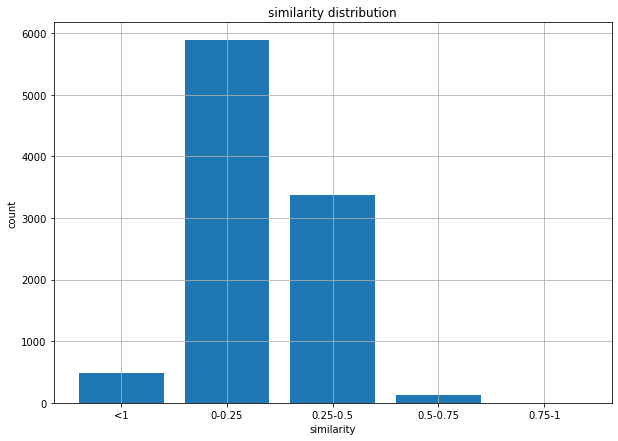

In [32]:
display_bar_plot(mp_sim_score_bar_range,"similarity distribution","similarity","count")

In [33]:
max(mp_sim_score.values())

0.7647743225097656

In [34]:
mp_sim_score_range = {}
for key,val in mp_sim_score.items():
    if val >= 0.2 and val <= 0.80:
        mp_sim_score_range[key] = val

In [35]:
mp_sim_score_range
maxval = max(mp_sim_score.values())
for k,v in mp_sim_score_range.items():
    mp_sim_score_range[k] = v/maxval

In [36]:
mp_sim_score_range

{'Early_life_and_background->Karamchand_Gandhi_1869': 0.9351419211795632,
 'Early_life_and_background->Alias_Kaba_Gandhi_1869': 1.0,
 'Early_life_and_background->Uttamchand_Gandhi_1869': 0.9580650722512358,
 'Early_life_and_background->Ahmedabad_1887': 0.45977252831939186,
 'Early_life_and_background->Ahmedabad_1915': 0.619181961133474,
 'Early_life_and_background->Kathiawad_Students_1887': 0.43640256121527726,
 'Early_life_and_background->Narayan_Hemchandra_1890': 0.40782854734363855,
 'Early_life_and_background->Time_Narayan_Hemchandra_1890': 0.40782854734363855,
 'Early_life_and_background->Narayan_1890': 0.4318554111736274,
 'Early_life_and_background->Briefless_Barristers_1893': 0.3724328926431931,
 'Early_life_and_background->Barrister_1893': 0.3593991216748719,
 'Early_life_and_background->Barrister_1890': 0.292846134733466,
 'Early_life_and_background->Barristers_1893': 0.40864104640838783,
 'Early_life_and_background->Bombay_Commissions_1893': 0.32250141534609267,
 'Early_life

In [37]:
mp_sim_score_high = {}
mp_sim_score_low = {}

for k,v in mp_sim_score_range.items():
    if v>=0.5:
        mp_sim_score_high[k] = v
    elif v<0.5:
        mp_sim_score_low[k] = v
        

In [38]:
# mp_sim_score_high = {k: float(v) for k, v in mp_sim_score_high.items()}
# with open("mp_sim_score_high.json", "w") as outfile:
#     json.dump(mp_sim_score_high, outfile)

In [21]:
# mp_sim_score_low = {k: float(v) for k, v in mp_sim_score_low.items()}
# with open("mp_sim_score_low.json", "w") as outfile:
#     json.dump(mp_sim_score_low, outfile)

In [3]:
# with open('mp_sim_score_low.json') as json_file:
#     mp_sim_score_low = json.load(json_file)
    
# with open("mp_sim_score_high.json") as outfile:
#     mp_sim_score_high = json.load(outfile)


In [39]:
mp_sim_score_high_80 = {}
for k,v in mp_sim_score_range.items():
#     print(v)
    if v>0.65:
        mp_sim_score_high_80[k] = v
# print(mp_sim_score_high_80)

In [40]:
mp_sim_score_high_80

{'Early_life_and_background->Karamchand_Gandhi_1869': 0.9351419211795632,
 'Early_life_and_background->Alias_Kaba_Gandhi_1869': 1.0,
 'Early_life_and_background->Uttamchand_Gandhi_1869': 0.9580650722512358,
 'Early_life_and_background->Raja_Sir_Pyarimohan_Mukarji_1896': 0.6567268219931066,
 'Early_life_and_background->Babu_Kalicharan_Banerji_1896': 0.7039141957342591,
 'Early_life_and_background->Maharshi_Devendranath_1896': 0.6962421002489014,
 'Early_life_and_background->Kakasaheb_1915': 0.6608666313765394,
 'Early_life_and_background->Professor_Kripalani_1915': 0.6834852804006365,
 'Early_life_and_background->Gangadharrao_Deshpande_1915': 0.7466982532010514,
 'Early_life_and_background->Shankarlal_Parikh_1919': 0.7275860150089036,
 'Early_life_and_background->Punjab_Government_1917': 0.7295527693397379,
 'Early_life_and_background->Punjab_Leaders_1917': 0.6680884815768078,
 'Student_of_law->Karamchand_Gandhi_1869': 0.8325382143445015,
 'Student_of_law->Alias_Kaba_Gandhi_1869': 0.873

## Sectionwise hyperlinks

In [41]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

# FetchURLSBetweenIds("Early_life_and_background","Three_years_in_London")

In [42]:
mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])
# print(mp_urls_section_mp)

In [43]:
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_high_80.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))

In [54]:
section_wise_keyword
for k ,v in section_wise_keyword.items():
    print(f"{k} ->  {v} ")
    print()
    print()

Early_life_and_background ->  {'Uttamchand_Gandhi_1869', 'Karamchand_Gandhi_1869', 'Punjab_Leaders_1917', 'Punjab_Government_1917', 'Alias_Kaba_Gandhi_1869', 'Professor_Kripalani_1915', 'Babu_Kalicharan_Banerji_1896', 'Raja_Sir_Pyarimohan_Mukarji_1896', 'Kakasaheb_1915', 'Maharshi_Devendranath_1896', 'Gangadharrao_Deshpande_1915', 'Shankarlal_Parikh_1919'} 


Student_of_law ->  {'Uttamchand_Gandhi_1869', 'Karamchand_Gandhi_1869', 'Calcutta_1896', 'Alias_Kaba_Gandhi_1869', 'Sir_Pherozeshah_Mehta_1901', 'Barristers_1893'} 


Vegetarianism_and_committee_work ->  {'Vegetarian_1890'} 


Called_to_the_bar ->  {'Uttamchand_Gandhi_1869', 'Karamchand_Gandhi_1869', 'Calcutta_1896', 'Christian_Indians_1924', 'Alias_Kaba_Gandhi_1869', 'Sir_Pherozeshah_Mehta_1901', 'Gujarat_1915', 'Maharshi_Devendranath_1896', 'Barrister_1893', 'Briefless_Barristers_1893', 'Barristers_1893'} 


Civil_rights_activist_in_South_Africa_(1893–1914) ->  {'Uttamchand_Gandhi_1869', 'Karamchand_Gandhi_1869', 'Sir_Pherozesha

 ### Now we have two maps  section_wise_keyword and mp_urls_section_mp

In [20]:
reamining_keywords = {}
for k ,v in section_wise_keyword.items():
    reamining_keywords[k] = v - mp_urls_section_mp[k]
    print(f"{k}  {len(section_wise_keyword[k])}  {len(reamining_keywords[k])}")

Early_life_and_background  12  12
Student_of_law  11  10
Vegetarianism_and_committee_work  1  1
Called_to_the_bar  13  13
Civil_rights_activist_in_South_Africa_(1893–1914)  7  6
Europeans,_Indians_and_Africans  5  5
Struggle_for_Indian_independence_(1915–1947)  1  1
Champaran_agitations  3  3
Kheda_agitations  3  3
Khilafat_movement  1  1
Non-co-operation  11  11
Salt_Satyagraha_(Salt_March)  2  2
Gandhi_as_folk_hero  6  6
Negotiations  1  1
Round_Table_Conferences  3  3
Partition_and_independence  3  3
Death  6  6
Funeral_and_memorials  2  2
Principles,_practices,_and_beliefs  3  3
Influences  5  5
Shrimad_Rajchandra  7  7
Religious_texts  3  3
Sufism  1  1
Support_for_wars  3  3
Truth_and_Satyagraha  10  9
Nonviolence  3  3
Buddhists,_Jains_and_Sikhs  1  1
Christians  1  1
Jews  1  1
Vegetarianism,_food,_and_animals  3  3
Women  9  9
Brahmacharya:_abstinence_from_sex_and_food  1  1
Untouchability_and_castes  3  3
Nai_Talim,_basic_education  3  3
Swaraj,_self-rule  1  1
Hindu_national

In [8]:
for k ,v in section_wise_keyword.items():
    print(f"{k}  {len(v)}")

Early_life_and_background  49
Student_of_law  60
Vegetarianism_and_committee_work  40
Called_to_the_bar  55
Civil_rights_activist_in_South_Africa_(1893–1914)  45
Europeans,_Indians_and_Africans  36
Struggle_for_Indian_independence_(1915–1947)  25
Role_in_World_War_I  13
Champaran_agitations  41
Kheda_agitations  35
Khilafat_movement  40
Non-co-operation  50
Salt_Satyagraha_(Salt_March)  30
Gandhi_as_folk_hero  52
Negotiations  26
Round_Table_Conferences  42
Congress_politics  22
World_War_II_and_Quit_India_movement  26
Partition_and_independence  38
Death  34
Funeral_and_memorials  22
Principles,_practices,_and_beliefs  25
Influences  46
Leo_Tolstoy  24
Shrimad_Rajchandra  48
Religious_texts  25
Sufism  34
Support_for_wars  19
Truth_and_Satyagraha  28
Nonviolence  33
Buddhists,_Jains_and_Sikhs  24
Muslims  38
Christians  15
Jews  20
Vegetarianism,_food,_and_animals  24
Fasting  17
Women  44
Brahmacharya:_abstinence_from_sex_and_food  29
Untouchability_and_castes  28
Nai_Talim,_basic_ed

In [52]:
def fetch_dates_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if len(year_list)>=2:
        return [min(year_list),max(year_list)] #if year_list else []
    elif len(year_list) == 1:
        return year_list
    else:
        return []
wiki_section_date_range = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date_range[k] = fetch_dates_from_content(v)

In [53]:
wiki_section_date_range

{'Biography': [],
 'Early_life_and_background': ['1822', '1914'],
 'Three_years_in_London': [],
 'Student_of_law': ['1888', '1889'],
 'Vegetarianism_and_committee_work': ['1875', '1927'],
 'Called_to_the_bar': ['1891', '1893'],
 'Civil_rights_activist_in_South_Africa_(1893–1914)': ['1893', '1915'],
 'Europeans,_Indians_and_Africans': ['1895', '1910'],
 'Struggle_for_Indian_independence_(1915–1947)': ['1915', '1947'],
 'Role_in_World_War_I': ['1906', '1918'],
 'Champaran_agitations': ['1917'],
 'Kheda_agitations': ['1918', '1918'],
 'Khilafat_movement': ['1917', '1922'],
 'Non-co-operation': ['1909', '1924'],
 'Salt_Satyagraha_(Salt_March)': ['1827', '1930'],
 'Gandhi_as_folk_hero': ['1890', '1920'],
 'Negotiations': ['1930', '1931'],
 'Round_Table_Conferences': ['1914', '1948'],
 'Congress_politics': ['1934', '1938'],
 'World_War_II_and_Quit_India_movement': ['1942', '1947'],
 'Partition_and_independence': ['1946', '1947'],
 'Death': ['1948', '1949'],
 'Funeral_and_memorials': ['1942',

In [50]:
# section_wise_keyword  -> 
# keyword_to_year ->
# wiki_section_date_range  ->

section_keyword_temporal = collections.defaultdict(list)
for k,v in section_wise_keyword.items():
    for words in v:
        for years in keyword_to_year[words]:
            if len(wiki_section_date_range[k]) > 0:
                if years in range(int(wiki_section_date_range[k][0]),int(wiki_section_date_range[k][1])):
#                     print(f"{k}   -> {words}")
                    section_keyword_temporal[k].append(words)

In [58]:
s1 = "a_b_2023"
print(s1[s1.rindex('_')+1:])
print(s1[:s1.rindex('_')])

2023
a_b


In [69]:
section_keyword_temporal = collections.defaultdict(set)
for k,v in section_wise_keyword.items():
    for s1 in v:
        if len(wiki_section_date_range[k]) == 2:
            if int(s1[s1.rindex('_')+1:]) in range(int(wiki_section_date_range[k][0]),int(wiki_section_date_range[k][1])):
                section_keyword_temporal[k].add(s1[:s1.rindex('_')])
        elif len(wiki_section_date_range[k]) == 1:
            if int(s1[s1.rindex('_')+1:]) == int(wiki_section_date_range[k][0]):
                section_keyword_temporal[k].add(s1[:s1.rindex('_')])

In [70]:
for k ,v in section_keyword_temporal.items():
    print(f"{k} ->  {v} ")
    print()

Early_life_and_background ->  {'Uttamchand_Gandhi', 'Raja_Sir_Pyarimohan_Mukarji', 'Babu_Kalicharan_Banerji', 'Karamchand_Gandhi', 'Alias_Kaba_Gandhi', 'Maharshi_Devendranath'} 

Vegetarianism_and_committee_work ->  {'Vegetarian'} 

Civil_rights_activist_in_South_Africa_(1893–1914) ->  {'Sir_Pherozeshah_Mehta'} 

Struggle_for_Indian_independence_(1915–1947) ->  {'Pandit_Motilal_Nehru', 'Shankarlal_Parikh'} 

Khilafat_movement ->  {'Mohanlal_Pandya', 'Punjab_Situation'} 

Non-co-operation ->  {'Pandit_Motilal_Nehru', 'Punjab_Government', 'Mohanlal_Pandya', 'Jalianwala_Bagh_Massacre', 'Punjab_Situation', 'Punjab_Leaders'} 

Salt_Satyagraha_(Salt_March) ->  {'Khilafat_Agitation', 'Pandit_Motilal_Nehru'} 

Gandhi_as_folk_hero ->  {'Pandit_Motilal_Nehru', 'Word_Sadagraha'} 

Round_Table_Conferences ->  {'Pandit_Motilal_Nehru'} 

Influences ->  {'Uttamchand_Gandhi', 'Karamchand_Gandhi', 'Barristers', 'Alias_Kaba_Gandhi', 'Hindu'} 

Shrimad_Rajchandra ->  {'Christian_Indians', 'Maharshi_Deven

In [51]:
section_keyword_temporal
